<a href="https://colab.research.google.com/github/PatilRutu66/Machine-learning/blob/main/Apartment_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Rutuja Patil**

**NUID: 002827468**

# **Data Sci Eng Methods**
Data Cleaning, Feature Selection, Modeling and Interpretability

# **Nashik apartment price prediction**
**Details about the Dataset:** This Nashik apartment price prediction dataset has been created to serve as valuable and helpful model for data science, machine learning, and data analysis.

**Variables:** Address, Owners, Cordinates, Longitude, Latitude, Per_month_emi, Price, Total_sqft and House_condition.

# **Abstract**

The dataset pertains to the housing market in Nashik, the fourth largest city in Maharashtra, India. Located approximately 200 kilometers from Mumbai and Pune, Nashik has emerged as an attractive destination for property investment, particularly for vacation homes and retirement residences. As real estate prices in neighboring cities surged, Nashik gained prominence as a viable alternative for permanent residency. This shift in perception was accompanied by improvements in social infrastructure, bolstering the city's economic growth and attractiveness to prospective homeowners. The dataset aims to provide insights into the dynamics of the Nashik housing market, facilitating informed decision-making for potential buyers and investors. With a focus on leveraging Python and data science skills, the project seeks to assist individuals in their quest for their ideal home in Nashik, thereby easing the challenges associated with the property search process.



# **Import libraries**

In [ ]:

# Import Libraries

!pip install fitter
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as stats

# Data Visualization
!pip install shap
import seaborn as sns
import matplotlib.pyplot as plt
import shap
shap.initjs()

# Figure Size
plt.figure(figsize=(18, 14), dpi=80)
sns.set(rc={"figure.figsize": (18, 14)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

#SHAP analysis
import io
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  # Example preprocessing step


##Installing all the required libraries for AutoML Modelling
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import norm
sns.set(rc={"figure.figsize": (16, 8)})

#LIME analysis
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
from lime import lime_tabular

#Linear model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

<Figure size 1440x1120 with 0 Axes>

# **Import Kaggle Dataset**

In [ ]:
!pip install -q opendatasets

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rutuja66","key":"601a8c8eac0e0420e09eea80e67bb7dc"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rushikeshdane20/nashik-apartment-price-prediction

nashik-apartment-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nashik-apartment-price-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv("final_data.csv")
data.shape
data.head()

Unnamed: 0                                            address  \
0           0  Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...   
1           1            Samraat Dream Citi, Samta Nagar, Nashik   
2           2         Suryaprakash Apartment,Nashik Road, Nashik   
3           3             Adishvar Residency,Nashik Road, Nashik   
4           4                                Nashik Road, Nashik   

             owners  housetype house_condition  BHK  price  per_month_emi  \
0   Mahendra Kotwal  Apartment             old  3.0  75.00          39.72   
1    Jiten Dadarkar  Apartment             old  2.0  41.00          21.71   
2            Pankaj  Apartment             old  2.0  53.35          28.25   
3            Saurav  Apartment             old  2.0  55.00          29.13   
4  Vivek Pavanaskar  Apartment             old  2.0  27.00          14.30   

   total_sqft                                         cordinates   latitude  \
0      1550.0                                      Sheetal Vihar  19.987960   
1      1000.0                                 Samraat Dream Citi  19.982460   
2       970.0                                      Surya Prakash  19.975850   
3      1000.0  Nashik Road, Vadner Dumala, Nashik, Maharashtr...  19.930532   
4       853.0                   Nashik Road, Nashik, Maharashtra  19.955310   

   longitude  
0  73.787390  
1  73.811840  
2  73.788750  
3  73.811734  
4  73.840890

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)



In [ ]:
data.dropna(subset="owners", inplace=True)

In [ ]:
data.head()

address            owners  \
0  Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...   Mahendra Kotwal   
1            Samraat Dream Citi, Samta Nagar, Nashik    Jiten Dadarkar   
2         Suryaprakash Apartment,Nashik Road, Nashik            Pankaj   
3             Adishvar Residency,Nashik Road, Nashik            Saurav   
4                                Nashik Road, Nashik  Vivek Pavanaskar   

   housetype house_condition  BHK  price  per_month_emi  total_sqft  \
0  Apartment             old  3.0  75.00          39.72      1550.0   
1  Apartment             old  2.0  41.00          21.71      1000.0   
2  Apartment             old  2.0  53.35          28.25       970.0   
3  Apartment             old  2.0  55.00          29.13      1000.0   
4  Apartment             old  2.0  27.00          14.30       853.0   

                                          cordinates   latitude  longitude  
0                                      Sheetal Vihar  19.987960  73.787390  
1                                 Samraat Dream Citi  19.982460  73.811840  
2                                      Surya Prakash  19.975850  73.788750  
3  Nashik Road, Vadner Dumala, Nashik, Maharashtr...  19.930532  73.811734  
4                   Nashik Road, Nashik, Maharashtra  19.955310  73.840890

In [ ]:
# To know the data types of the variables
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['address', 'owners', 'housetype', 'house_condition', 'cordinates']
Numerical Columns :  ['BHK', 'price', 'per_month_emi', 'total_sqft', 'latitude', 'longitude']


# **Exploratory Data Analysis (EDA)**

# **Data Cleaning**

In [ ]:
#To know the duplicate values
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          5197 non-null   object 
 1   owners           5197 non-null   object 
 2   housetype        5197 non-null   object 
 3   house_condition  5197 non-null   object 
 4   BHK              5049 non-null   float64
 5   price            4333 non-null   float64
 6   per_month_emi    4327 non-null   float64
 7   total_sqft       3787 non-null   float64
 8   cordinates       5197 non-null   object 
 9   latitude         5197 non-null   float64
 10  longitude        5197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 487.2+ KB


In [ ]:
#To know the missing values
data.isnull().sum()

address               0
owners                0
housetype             0
house_condition       0
BHK                 148
price               864
per_month_emi       870
total_sqft         1410
cordinates            0
latitude              0
longitude             0
dtype: int64

In [ ]:
#To know the missing value percentage
missing_list = data.columns[data.isna().any()].tolist()
missing_count = []
for i in missing_list:
    missing_count.append(sum(pd.isnull(data[str(i)])))

d = {"Missing_Column": missing_list, "Missing_Values": missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF["Missing_Values"] / data.shape[0]) * 100
Missing_DF

Missing_Column  Missing_Values  %_Missing
0            BHK             148   2.847797
1          price             864  16.624976
2  per_month_emi             870  16.740427
3     total_sqft            1410  27.131037

In [ ]:
data.describe()

BHK        price  per_month_emi    total_sqft     latitude  \
count  5049.000000  4333.000000    4327.000000   3787.000000  5197.000000   
mean      2.033769    56.260769      21.695087   1114.517560    19.989146   
std       0.918962   302.695850      24.913194    890.991154     0.523058   
min       1.000000     1.000000       1.050000    150.000000    12.907250   
25%       1.000000    21.670000      11.650000    737.500000    19.960450   
50%       2.000000    33.000000      18.170000    978.000000    19.981484   
75%       2.000000    49.000000      26.480000   1300.000000    20.012770   
max      10.000000  9668.000000     844.000000  40000.000000    32.113550   

         longitude  
count  5197.000000  
mean     73.661972  
std       3.631357  
min      -0.812310  
25%      73.756990  
50%      73.782900  
75%      73.814700  
max      83.017410

## **KNN imputation method for missing values**

In [ ]:
#Imputing missing values with KNN imputation method
import pandas as pd
from sklearn.impute import KNNImputer

def impute_with_knn(data, n_neighbors=5):

    # Create a copy of the original DataFrame
    imputed_data = data.copy()
    for column in ["total_sqft", "price", "per_month_emi"]:
        impute_column = imputed_data[[column]]
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputed_values = imputer.fit_transform(impute_column)

        #To replace coulmns with imputed values
        imputed_data[column] = imputed_values

    return imputed_data

In [ ]:
knn_imputed_data=impute_with_knn(data,n_neighbors=5)

In [ ]:
knn_imputed_data.isnull().sum()

address              0
owners               0
housetype            0
house_condition      0
BHK                148
price                0
per_month_emi        0
total_sqft           0
cordinates           0
latitude             0
longitude            0
dtype: int64

In [ ]:
knn_imputed_data.isnull().sum()

address              0
owners               0
housetype            0
house_condition      0
BHK                148
price                0
per_month_emi        0
total_sqft           0
cordinates           0
latitude             0
longitude            0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
train_data = knn_imputed_data.dropna(subset=['BHK'])
X_train = train_data[['total_sqft','price','per_month_emi']]
y_train = train_data['BHK']
knn_imputed_reg_data=knn_imputed_data.copy()

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting missing values
X_missing = knn_imputed_reg_data[knn_imputed_data['BHK'].isnull()][['total_sqft','price','per_month_emi']]
predicted_bhk = model.predict(X_missing)
predicted_bhk_rounded = np.round(predicted_bhk)

knn_imputed_reg_data.loc[knn_imputed_reg_data['BHK'].isnull(), 'BHK'] = predicted_bhk_rounded

In [ ]:
knn_imputed_reg_data.isnull().sum()

address            0
owners             0
housetype          0
house_condition    0
BHK                0
price              0
per_month_emi      0
total_sqft         0
cordinates         0
latitude           0
longitude          0
dtype: int64

2024-04-02 22:10:45.554 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=34.820651)
2024-04-02 22:10:45.574 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=38.030493)
2024-04-02 22:10:46.039 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=37.688105)
2024-04-02 22:10:46.538 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=34.912423)
2024-04-02 22:10:46.600 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=39.804593)
2024-04-02 22:10:46.618 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=38.870205)
2024-04-02 22:10:46.688 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=36.464726)
2024-04-02 22:10:46.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitt

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy          34.820651   917.681021   930.792694     inf      0.253040   
gamma           34.912423  1451.356952  1471.024463     inf      0.684511   
exponpow        35.962249   764.371136   784.038646     inf      0.283883   
powerlaw        36.464726   764.990153   784.657663     inf      0.555493   
chi2            37.688105  1174.812914  1194.480424     inf      0.492294   

              ks_pvalue  
cauchy    8.876766e-294  
gamma      0.000000e+00  
exponpow   0.000000e+00  
powerlaw   0.000000e+00  
chi2       0.000000e+00  


Text(0.5, 0, 'BHK')

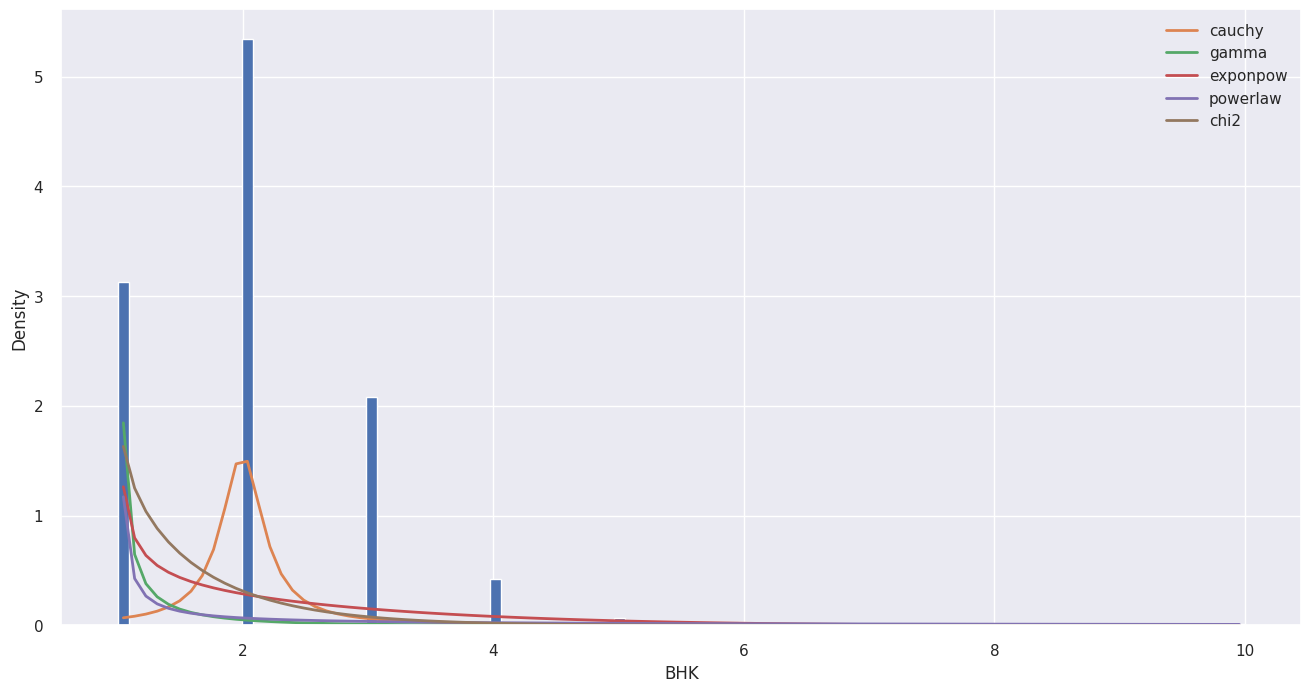

In [ ]:
bhk = knn_imputed_reg_data["BHK"].values
f = Fitter(bhk, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("BHK")

2024-04-02 22:10:48.441 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=7e-06)
2024-04-02 22:10:48.472 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=6e-06)
2024-04-02 22:10:49.046 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=7e-06)
2024-04-02 22:10:49.636 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=9.7e-05)
2024-04-02 22:10:49.701 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=2e-06)
2024-04-02 22:10:49.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=7.4e-05)
2024-04-02 22:10:49.797 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=7.1e-05)
2024-04-02 22:10:49.822 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distributi

          sumsquare_error           aic           bic  kl_div  ks_statistic  \
lognorm          0.000002   6766.493425   6786.160936     inf      0.115432   
expon            0.000006  18299.835663  18312.947336     inf      0.220294   
cauchy           0.000007   2965.774898   2978.886572     inf      0.139184   
chi2             0.000007  17379.460507  17399.128018     inf      0.219141   
exponpow         0.000036  11888.474273  11908.141784     inf      0.301623   

              ks_pvalue  
lognorm    8.758549e-61  
expon     5.686601e-222  
cauchy     2.731543e-88  
chi2      1.244016e-219  
exponpow   0.000000e+00  


Text(0.5, 0, 'price')

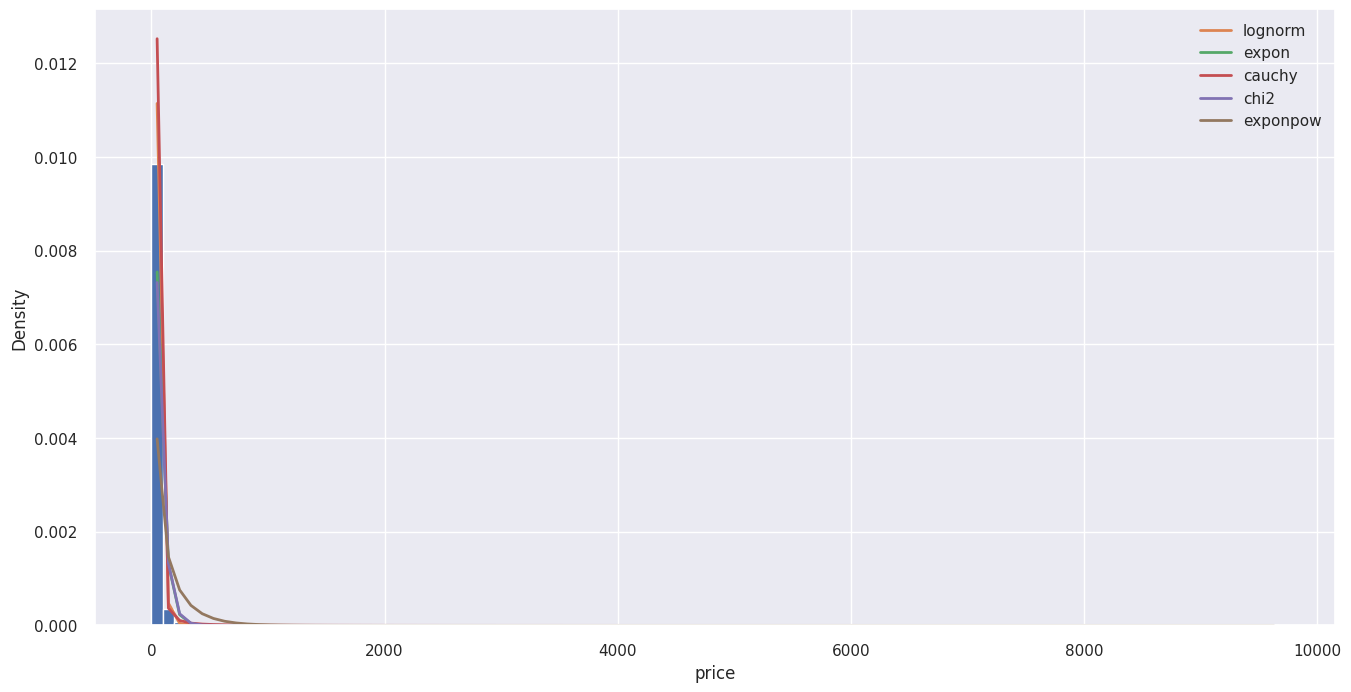

In [ ]:
price = knn_imputed_reg_data["price"].values
f = Fitter(price, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("price")

Text(0.5, 0, 'price')

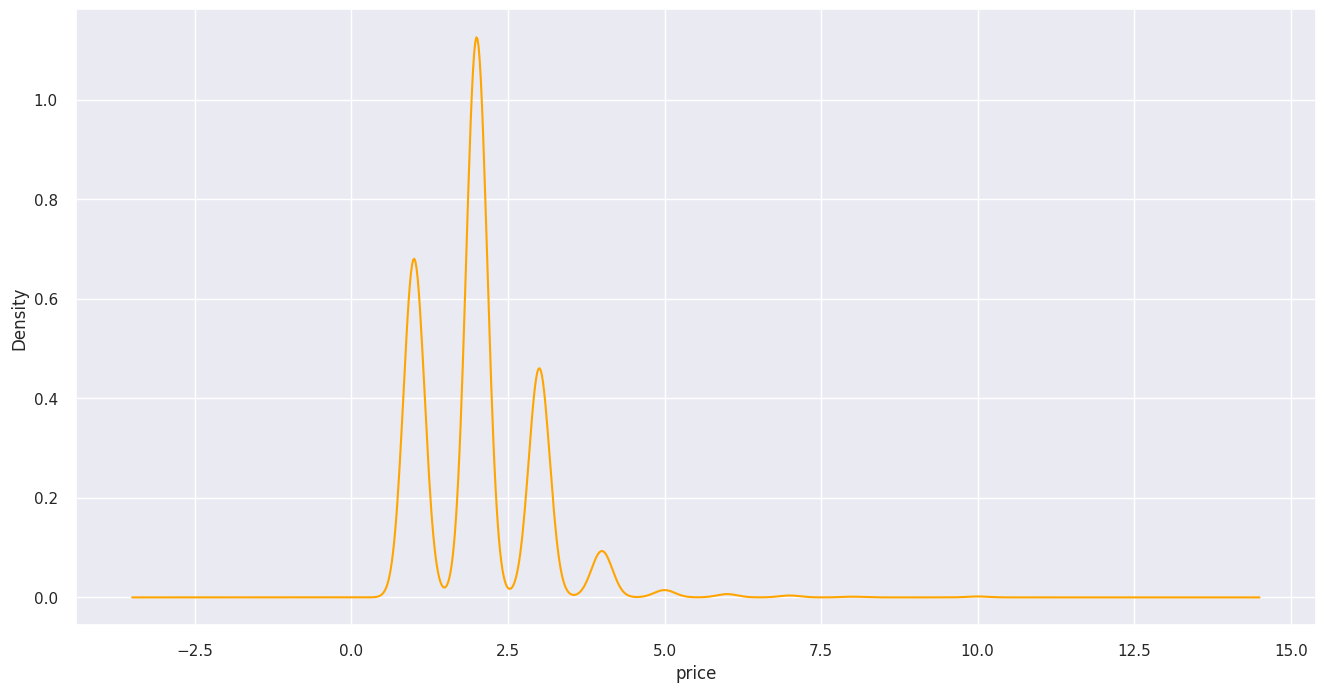

In [ ]:
data.BHK.plot.density(color="Orange")
plt.xlabel("price")

In [ ]:
knn_imputed_reg_data.corr()

<ipython-input-241-a98337321a74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  knn_imputed_reg_data.corr()


BHK     price  per_month_emi  total_sqft  latitude  \
BHK            1.000000  0.104438       0.296542    0.484345  0.022527   
price          0.104438  1.000000       0.059077    0.076908 -0.001584   
per_month_emi  0.296542  0.059077       1.000000    0.196432 -0.000851   
total_sqft     0.484345  0.076908       0.196432    1.000000  0.002999   
latitude       0.022527 -0.001584      -0.000851    0.002999  1.000000   
longitude      0.014988 -0.000791      -0.004571   -0.005605  0.717040   

               longitude  
BHK             0.014988  
price          -0.000791  
per_month_emi  -0.004571  
total_sqft     -0.005605  
latitude        0.717040  
longitude       1.000000

## Heatmap for the imputed data

<ipython-input-242-64b8c1deafcd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(knn_imputed_reg_data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

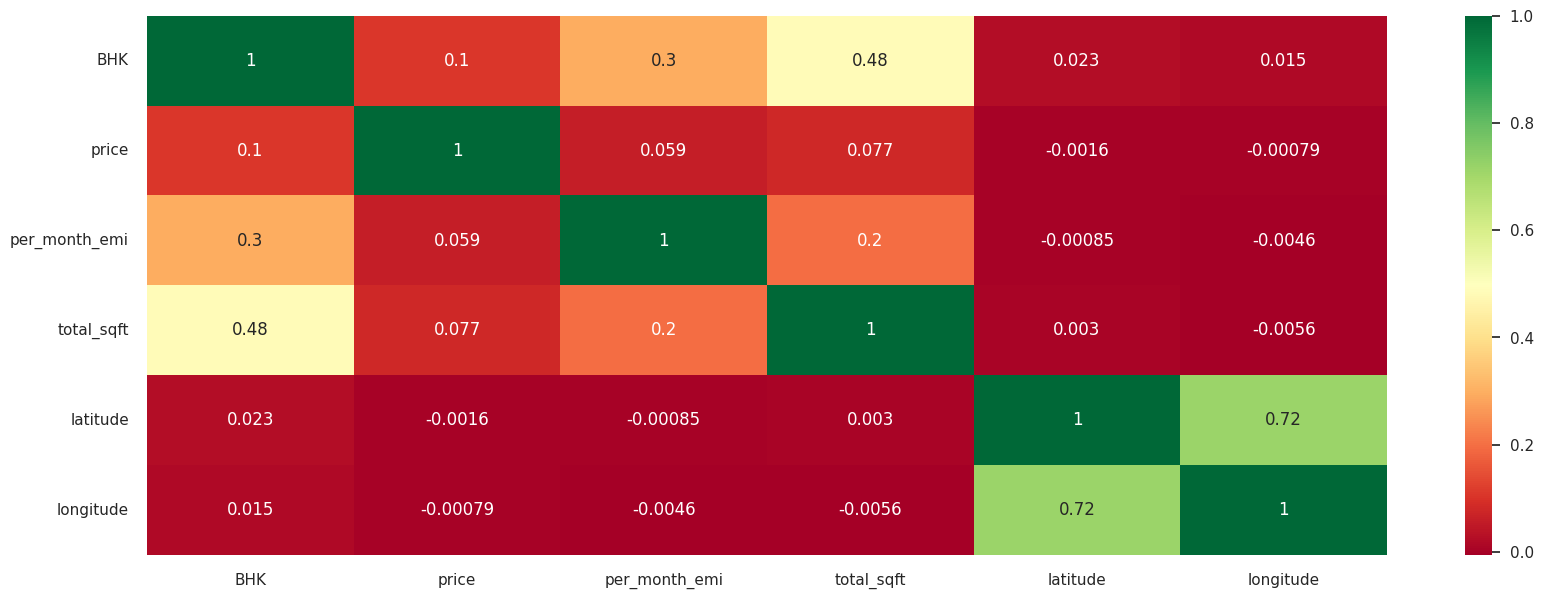

In [ ]:
# Heat map for numerical variables
plt.figure(figsize=(20, 7))
sns.heatmap(knn_imputed_reg_data.corr(), annot=True, cmap="RdYlGn")

## **One Hot Encoding**

In [ ]:
#Encoding with one hot encoding
def encode_oneHot(df):
    df_one_hot = pd.get_dummies(
        df,
        columns=[
            "housetype",
            "house_condition",
            ],
    )
    return df_one_hot

In [ ]:
knn_imputed_reg_onehot_data = encode_oneHot(knn_imputed_reg_data)

<ipython-input-245-36394a146a40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(knn_imputed_reg_onehot_data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

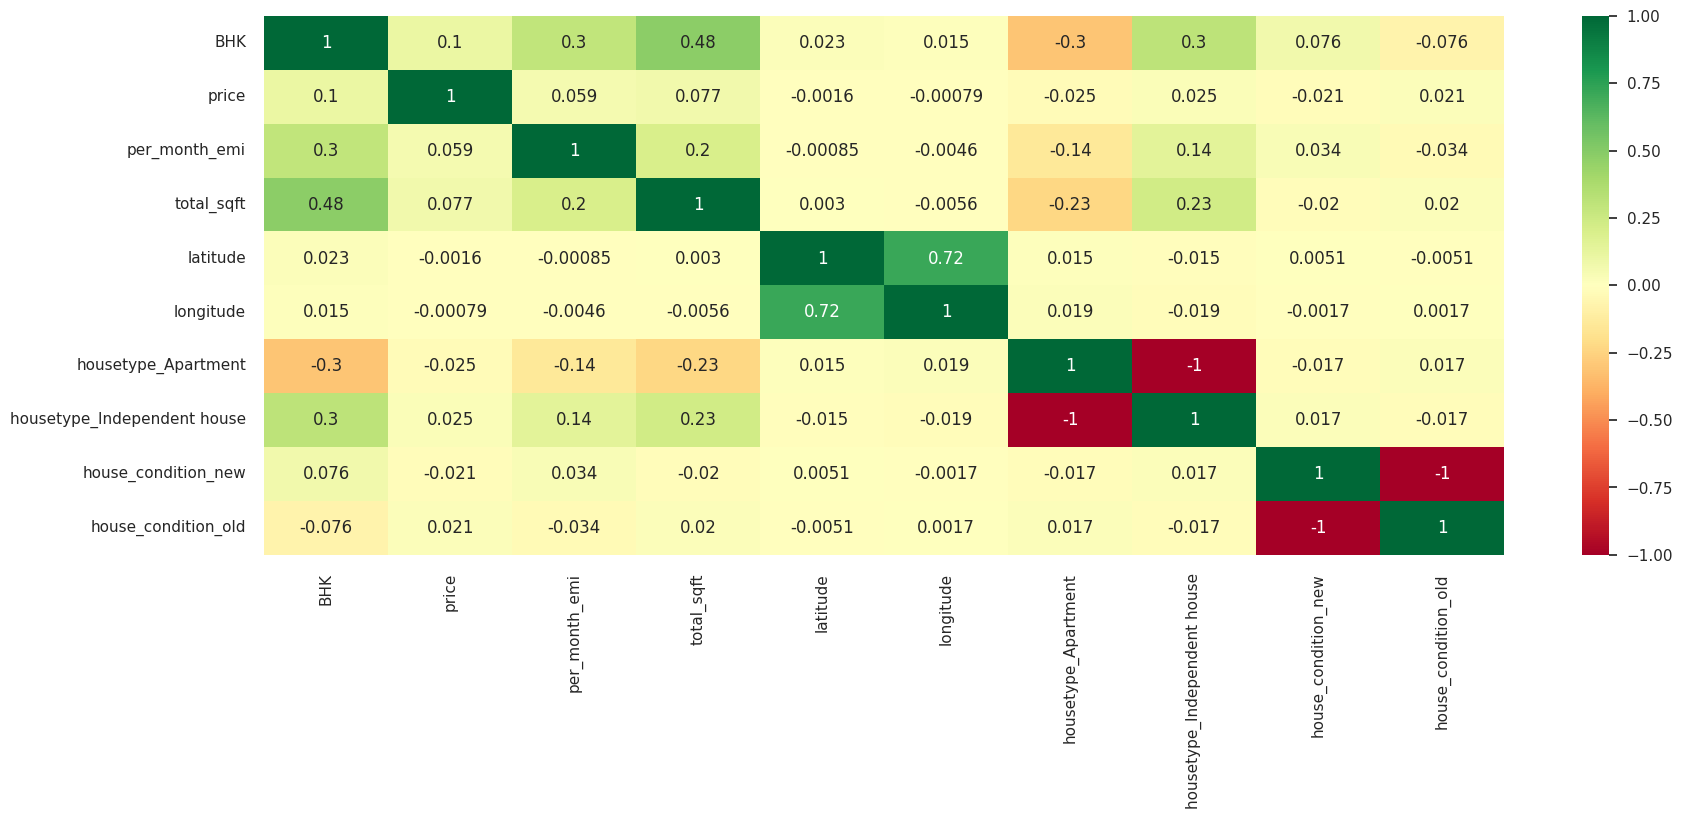

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(knn_imputed_reg_onehot_data.corr(), annot=True, cmap="RdYlGn")

## **OLS(Ordinary Least Squares) regression results**

In [ ]:
features = ['BHK', 'per_month_emi', 'total_sqft','latitude','longitude','housetype_Apartment','housetype_Independent house','house_condition_new','house_condition_old']
target_variable = 'price'

X = knn_imputed_reg_onehot_data[features]
y = knn_imputed_reg_onehot_data[target_variable]

In [ ]:
#X is feature matrix and y is target variable
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_


In [ ]:
model = sm.OLS(
    knn_imputed_reg_onehot_data["price"],
    knn_imputed_reg_onehot_data[
       ['BHK', 'per_month_emi', 'total_sqft','latitude','longitude','housetype_Apartment','housetype_Independent house','house_condition_new','house_condition_old',]
    ],
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.12
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.23e-12
Time:                        22:11:01   Log-Likelihood:                -36555.
No. Observations:                5197   AIC:                         7.313e+04
Df Residuals:                    5189   BIC:                         7.318e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
BHK                            26.1867      5.067      5.168      0.000      16.253      36.120
per_month_emi                   0.3647      0.176      2.071      0.038       0.019       0.710
total_sqft                      0.0115      0.006      1.985      0.047       0.000       0.023
latitude                       -2.3593     10.455     -0.226      0.821     -22.855      18.137
longitude                       0.0878      1.506      0.058      0.954      -2.864       3.040
housetype_Apartment            13.2237     75.547      0.175      0.861    -134.880     161.328
housetype_Independent house     5.1563     75.736      0.068      0.946    -143.318     153.630
house_condition_new             1.1719     75.659      0.015      0.988    -147.151     149.495
house_condition_old            17.2081     75.523      0.228      0.820    -130.849     165.265
==============================================================================
Omnibus:                    12634.535   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104714615.629
Skew:                          25.520   Prob(JB):                         0.00
Kurtosis:                     696.522   Cond. No.                     1.63e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.57e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Correlation matrix**

In [ ]:
#checking the correlation between all the features in the data
knn_imputed_reg_onehot_data[["BHK","per_month_emi","total_sqft","housetype_Apartment","housetype_Independent house","house_condition_new","house_condition_old"]].corr()

BHK  per_month_emi  total_sqft  \
BHK                          1.000000       0.296542    0.484345   
per_month_emi                0.296542       1.000000    0.196432   
total_sqft                   0.484345       0.196432    1.000000   
housetype_Apartment         -0.304959      -0.141048   -0.230070   
housetype_Independent house  0.304959       0.141048    0.230070   
house_condition_new          0.075690       0.034481   -0.019781   
house_condition_old         -0.075690      -0.034481    0.019781   

                             housetype_Apartment  housetype_Independent house  \
BHK                                    -0.304959                     0.304959   
per_month_emi                          -0.141048                     0.141048   
total_sqft                             -0.230070                     0.230070   
housetype_Apartment                     1.000000                    -1.000000   
housetype_Independent house            -1.000000                     1.000000   
house_condition_new                    -0.017001                     0.017001   
house_condition_old                     0.017001                    -0.017001   

                             house_condition_new  house_condition_old  
BHK                                     0.075690            -0.075690  
per_month_emi                           0.034481            -0.034481  
total_sqft                             -0.019781             0.019781  
housetype_Apartment                    -0.017001             0.017001  
housetype_Independent house             0.017001            -0.017001  
house_condition_new                     1.000000            -1.000000  
house_condition_old                    -1.000000             1.000000

In [ ]:
knn_imputed_reg_data.columns

Index(['address', 'owners', 'housetype', 'house_condition', 'BHK', 'price',
       'per_month_emi', 'total_sqft', 'cordinates', 'latitude', 'longitude'],
      dtype='object')

## **Data Visualization**

## Visualization to check the outliers

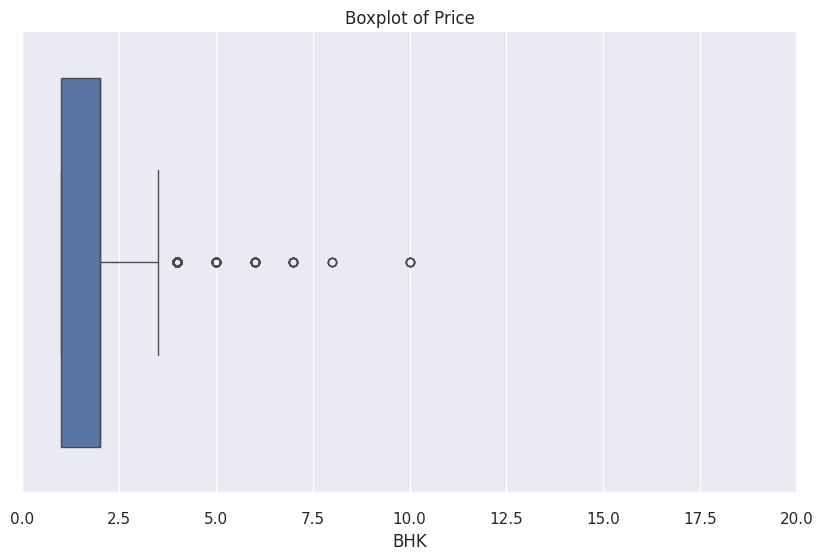

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=knn_imputed_reg_onehot_data['BHK'])

plt.xlim(0, 20)

plt.title('Boxplot of Price')
plt.xlabel('BHK')
plt.show()


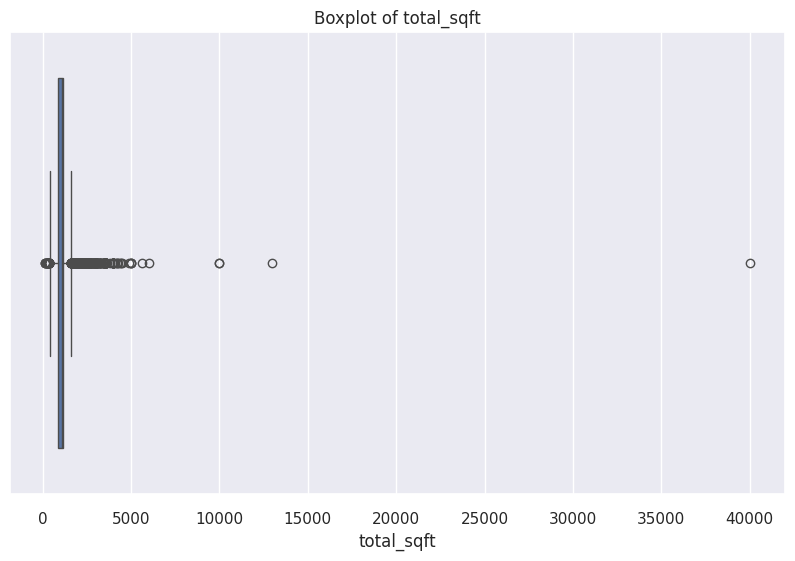

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=knn_imputed_reg_onehot_data['total_sqft'])

plt.title('Boxplot of total_sqft')
plt.xlabel('total_sqft')
plt.show()


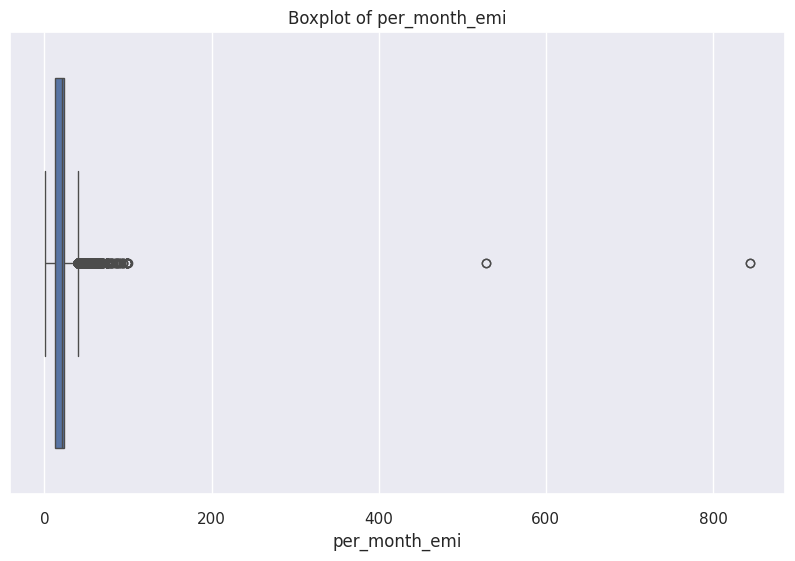

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=knn_imputed_reg_onehot_data['per_month_emi'])

plt.title('Boxplot of per_month_emi')
plt.xlabel('per_month_emi')
plt.show()


There are outliers in BHK, total_sqft and per_month_emi variables.

In [ ]:
#Splitting data into test, train and validation set
X = knn_imputed_reg_onehot_data[
    [
        "BHK",
        "total_sqft",
        "per_month_emi",

    ]
]

y = knn_imputed_reg_onehot_data["price"]

# Spliting data into Training, Validation set  and Test set.
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

## **Implementing Linear Regression with outliers for Train ,Test and Validation split**

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % root_mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 279.79
Coefficient of determination: 0.01
R^2 score on tarining set = 0.01211487868982819


In [ ]:
y_pred = regr.predict(X_test)
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Root mean squared error: 332.33
Coefficient of determination: 0.01
R^2 score on test set = 0.009678197783804299


In [ ]:
y_pred = regr.predict(X_val)
print("Root mean squared error: %.2f" % root_mean_squared_error(y_val, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Root mean squared error: 28.71
Coefficient of determination: 0.37
R^2 score on validation set = 0.3659362656270101


## **Implementing linear regression without outlier for Train, Test and Validation split without outliers**

In [ ]:
from scipy.stats import zscore

z_scores = zscore(knn_imputed_reg_onehot_data['price'])
knn_imputed_reg_onehot_noout_data = knn_imputed_reg_onehot_data[(z_scores < 3) & (z_scores > -3)]

z_scores = zscore(knn_imputed_reg_onehot_data['total_sqft'])
knn_imputed_reg_onehot_noout_data = knn_imputed_reg_onehot_data[(z_scores < 3) & (z_scores > -3)]

z_scores = zscore(knn_imputed_reg_onehot_data['per_month_emi'])
knn_imputed_reg_onehot_noout_data = knn_imputed_reg_onehot_data[(z_scores < 3) & (z_scores > -3)]

In [ ]:
X = knn_imputed_reg_onehot_noout_data[
    [
        "BHK",
        "total_sqft",
        "per_month_emi"

    ]
]

y = knn_imputed_reg_onehot_noout_data["price"]



X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [ ]:
y_pred = regr.predict(X_train)
print("Root mean squared error: %.2f" % root_mean_squared_error(y_train, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Root mean squared error: 313.92
Coefficient of determination: 0.02
R^2 score on tarining set = 0.015519128256308079


In [ ]:
y_pred = regr.predict(X_test)
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Root mean squared error: 52.63
Coefficient of determination: -0.01
R^2 score on test set = -0.011488353001672946


In [ ]:
y_pred = regr.predict(X_val)
print("Root mean squared error: %.2f" % root_mean_squared_error(y_val, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Root mean squared error: 256.78
Coefficient of determination: 0.01
R^2 score on validation set = 0.010449186398846178


We can see that the model has performed better without the outliers.

## **Eliminationg outliers**

In [ ]:
def remove_outliers_iqr(df, columns):
    cleaned_data = df.copy()
    for column in columns:
        Q1 = np.percentile(cleaned_data[column], 25)
        Q3 = np.percentile(cleaned_data[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# Specify numerical columns for outlier removal
numerical_columns = ['BHK','price', 'total_sqft','per_month_emi' ]

# Remove outliers using the IQR method
cleaned_data = remove_outliers_iqr(knn_imputed_reg_onehot_noout_data, numerical_columns)


In [ ]:
# Print the shape of the cleaned data (number of rows and columns)
print("Shape of cleaned data:", cleaned_data.shape)

# Display the first few rows of the cleaned data
print("\nFirst few rows of cleaned data:")
print(cleaned_data.head())

# Check for missing values in the cleaned data
print("\nMissing values in cleaned data:")
print(cleaned_data.isnull().sum())


Shape of cleaned data: (4364, 13)

First few rows of cleaned data:
                                      address            owners  BHK  price  \
1     Samraat Dream Citi, Samta Nagar, Nashik    Jiten Dadarkar  2.0  41.00   
2  Suryaprakash Apartment,Nashik Road, Nashik            Pankaj  2.0  53.35   
3      Adishvar Residency,Nashik Road, Nashik            Saurav  2.0  55.00   
4                         Nashik Road, Nashik  Vivek Pavanaskar  2.0  27.00   
5             Gurucharani,Nashik Road, Nashik     Darshan Muley  2.0  42.00   

   per_month_emi  total_sqft  \
1          21.71      1000.0   
2          28.25       970.0   
3          29.13      1000.0   
4          14.30       853.0   
5          22.24      1050.0   

                                          cordinates   latitude  longitude  \
1                                 Samraat Dream Citi  19.982460  73.811840   
2                                      Surya Prakash  19.975850  73.788750   
3  Nashik Road, Vadner Dumala, 

Stored the data without outliers as cleaned data

In [ ]:
knn_imputed_reg_onehot_noout_data.describe()

BHK        price  per_month_emi    total_sqft     latitude  \
count  5176.000000  5176.000000    5176.000000   5176.000000  5176.000000   
mean      2.022508    55.898988      20.932128   1109.390596    19.989179   
std       0.901971   276.843046      11.769984    753.430010     0.524110   
min       1.000000     2.500000       1.050000    150.000000    12.907250   
25%       1.000000    24.000000      13.240000    845.000000    19.960450   
50%       2.000000    38.000000      20.650000   1114.517560    19.981484   
75%       2.000000    56.260769      23.830000   1140.000000    20.012770   
max      10.000000  9668.000000      89.360000  40000.000000    32.113550   

         longitude  housetype_Apartment  housetype_Independent house  \
count  5176.000000          5176.000000                  5176.000000   
mean     73.661412             0.785162                     0.214838   
std       3.638705             0.410749                     0.410749   
min      -0.812310             0.000000                     0.000000   
25%      73.756990             1.000000                     0.000000   
50%      73.782900             1.000000                     0.000000   
75%      73.814700             1.000000                     0.000000   
max      83.017410             1.000000                     1.000000   

       house_condition_new  house_condition_old  
count          5176.000000          5176.000000  
mean              0.345440             0.654560  
std               0.475558             0.475558  
min               0.000000             0.000000  
25%               0.000000             0.000000  
50%               0.000000             1.000000  
75%               1.000000             1.000000  
max               1.000000             1.000000

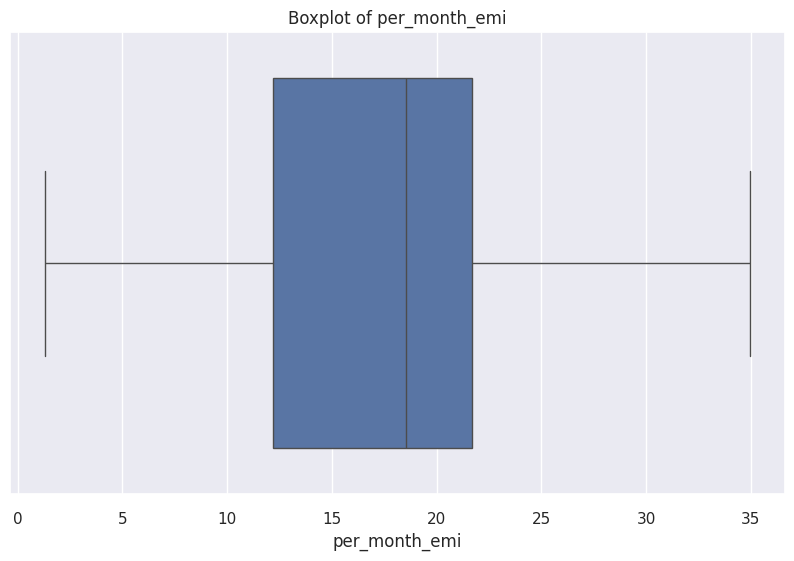

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=cleaned_data['per_month_emi'])

plt.title('Boxplot of per_month_emi')
plt.xlabel('per_month_emi')
plt.show()

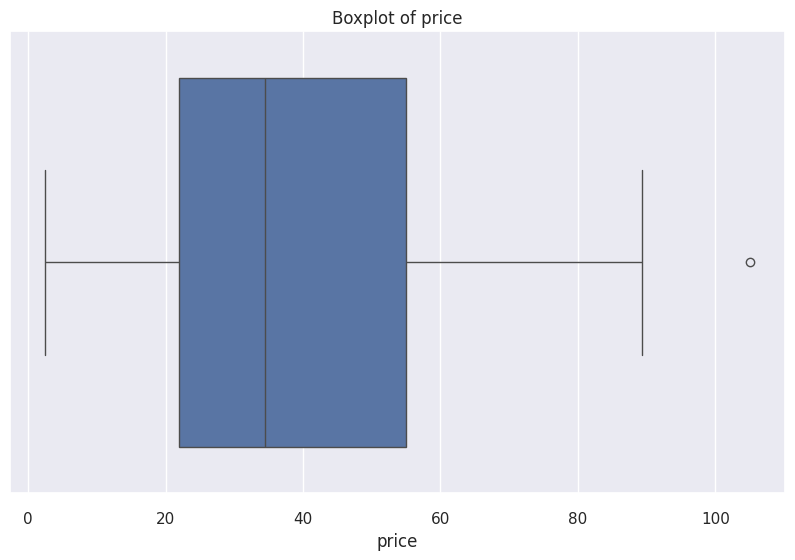

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=cleaned_data['price'])

plt.title('Boxplot of price')
plt.xlabel('price')
plt.show()

In [ ]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

## **Importing the Cleaned Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data (8).csv


In [ ]:
# Display the names of uploaded files to verify the file exists
print(uploaded.keys())


dict_keys(['cleaned_data (8).csv'])


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data (8).csv']))

## **Computing VIF(Variance Inflation Factor)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df[[
 'BHK',
 'per_month_emi',
 'total_sqft',
  'latitude',
 'longitude',
 'housetype_Independent house',
 'house_condition_old'
 ]]


In [ ]:
 # Select only numeric columns
numeric_cols = Multic.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["variables"] = numeric_cols.columns
vif["VIF"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

In [ ]:
vif

variables       VIF
0                          BHK  1.528981
1                per_month_emi  1.885092
2                   total_sqft  1.887907
3                     latitude  2.094458
4                    longitude  2.095612
5          housetype_Apartment       inf
6  housetype_Independent house       inf
7          house_condition_new       inf
8          house_condition_old       inf



```
# This is formatted as code
```

BHK : A VIF of 1.528981 indicates low multicollinearity with other variables in the model. This suggests that BHK is fairly independent and its coefficient estimate should be stable.

Per Month EMI : With a VIF of 1.885092, this also suggests low multicollinearity. It implies that the variable is relatively independent of the others in terms of explaining the variance.

Total Sqft : A VIF of 1.887907 indicates a low degree of multicollinearity, similar to Per Month EMI, indicating it is fairly independent.

Latitude and Longitude: Both have VIF values slightly over 2, suggesting a very slight increase in multicollinearity compared to the other variables. However, these values are still within an acceptable range, indicating that each provides unique information to the model.

Housetype and House Condition : The VIF values reported as "inf" (infinite) for these categorical variables indicate perfect multicollinearity. This is due to the one hot encoding and one variable can give the value of another variable.

In [ ]:
df.head()

Unnamed: 0                                     address            owners  \
0           1     Samraat Dream Citi, Samta Nagar, Nashik    Jiten Dadarkar   
1           2  Suryaprakash Apartment,Nashik Road, Nashik            Pankaj   
2           3      Adishvar Residency,Nashik Road, Nashik            Saurav   
3           4                         Nashik Road, Nashik  Vivek Pavanaskar   
4           5             Gurucharani,Nashik Road, Nashik     Darshan Muley   

   BHK  price  per_month_emi  total_sqft  \
0  2.0  41.00          21.71      1000.0   
1  2.0  53.35          28.25       970.0   
2  2.0  55.00          29.13      1000.0   
3  2.0  27.00          14.30       853.0   
4  2.0  42.00          22.24      1050.0   

                                          cordinates   latitude  longitude  \
0                                 Samraat Dream Citi  19.982460  73.811840   
1                                      Surya Prakash  19.975850  73.788750   
2  Nashik Road, Vadner Dumala, Nashik, Maharashtr...  19.930532  73.811734   
3                   Nashik Road, Nashik, Maharashtra  19.955310  73.840890   
4                                         Gurucharni  20.001320  73.755030   

   housetype_Apartment  housetype_Independent house  house_condition_new  \
0                    1                            0                    0   
1                    1                            0                    0   
2                    1                            0                    0   
3                    1                            0                    0   
4                    1                            0                    0   

   house_condition_old  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
df = df.rename(columns={'housetype_Independent house': 'housetype_Independent_house'})


# **Model Interpretability**

In [ ]:
pip install -U scikit-learn


In [ ]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data (7).csv


In [ ]:
print(uploaded.keys())

dict_keys(['cleaned_data (7).csv'])


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data (7).csv']))

In [ ]:
df.head()

Unnamed: 0                                     address            owners  \
0           1     Samraat Dream Citi, Samta Nagar, Nashik    Jiten Dadarkar   
1           2  Suryaprakash Apartment,Nashik Road, Nashik            Pankaj   
2           3      Adishvar Residency,Nashik Road, Nashik            Saurav   
3           4                         Nashik Road, Nashik  Vivek Pavanaskar   
4           5             Gurucharani,Nashik Road, Nashik     Darshan Muley   

   BHK  price  per_month_emi  total_sqft  \
0  2.0  41.00          21.71      1000.0   
1  2.0  53.35          28.25       970.0   
2  2.0  55.00          29.13      1000.0   
3  2.0  27.00          14.30       853.0   
4  2.0  42.00          22.24      1050.0   

                                          cordinates   latitude  longitude  \
0                                 Samraat Dream Citi  19.982460  73.811840   
1                                      Surya Prakash  19.975850  73.788750   
2  Nashik Road, Vadner Dumala, Nashik, Maharashtr...  19.930532  73.811734   
3                   Nashik Road, Nashik, Maharashtra  19.955310  73.840890   
4                                         Gurucharni  20.001320  73.755030   

   housetype_Apartment  housetype_Independent house  house_condition_new  \
0                    1                            0                    0   
1                    1                            0                    0   
2                    1                            0                    0   
3                    1                            0                    0   
4                    1                            0                    0   

   house_condition_old  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
df=df.drop(['Unnamed: 0', 'address', 'owners', 'cordinates','longitude','housetype_Independent house','house_condition_old'], axis=1)

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train)

      BHK  per_month_emi   total_sqft   latitude  housetype_Apartment  \
0     2.0      21.710000  1000.000000  19.982460                    1   
1     2.0      28.250000   970.000000  19.975850                    1   
2     2.0      29.130000  1000.000000  19.930532                    1   
3     2.0      14.300000   853.000000  19.955310                    1   
4     2.0      22.240000  1050.000000  20.001320                    1   
...   ...            ...          ...        ...                  ...   
4161  2.0      21.170000  1109.588872  20.048130                    0   
4162  2.0      21.550305  1109.588872  19.954960                    0   
4163  2.0      21.550305  1109.588872  12.907250                    0   
4164  3.0      17.890000  1109.588872  20.024500                    0   
4165  2.0      21.550305  1109.588872  20.047230                    0   

      house_condition_new  
0                       0  
1                       0  
2                       0  
3          

## **Linear Regression**

In [ ]:
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add')
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [ ]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 5.685, test MAE = 3.186 


## **Interpreting Regression Co-efficients**

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1660.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:18:33   Log-Likelihood:                -14880.
No. Observations:                4166   AIC:                         2.977e+04
Df Residuals:                    4159   BIC:                         2.982e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.4687      0.133    265.685      0.000      35.207      35.730
BHK                    -2.6158      0.165    -15.859      0.000      -2.939      -2.292
per_month_emi          12.4451      0.184     67.718      0.000      12.085      12.805
total_sqft              3.0192      0.189     15.993      0.000       2.649       3.389
latitude               -0.5286      0.134     -3.955      0.000      -0.791      -0.267
housetype_Apartment     0.3515      0.146      2.411      0.016       0.066       0.637
house_condition_new    -0.7043      0.150     -4.707      0.000      -0.998      -0.411
==============================================================================
Omnibus:                      629.888   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4087.346
Skew:                          -0.552   Prob(JB):                         0.00
Kurtosis:                       7.725   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **The OLS regression coefficients and their interpretation**

**const** (35.4687): This word represents the intercept. It shows that the beginning value for the price prediction is roughly 35.4687 units when all other variables are maintained at zero.

**BHK** (-2.6158): The price projection will typically drop by 2.6158 units for every extra bedroom, hall, or kitchen. This may seem contradictory because a property's worth would typically rise with the number of rooms, indicating the need for additional research.

**per_month_emi** (12.4451): The price prediction rises by 12.4451 units for every unit increase in the expected monthly EMI, demonstrating a strong positive correlation between EMI and property price.

**total_sqft** (3.0192): The expected price increases by 3.0192 units for every square foot added, in line with the idea that larger properties will cost more.

**housetype_Apartment** (0.3515): Compared to the baseline home type, the price projection for an apartment increases by 0.3515 units, suggesting that apartments may be somewhat more expensive.

**house_condition_new** (-0.7043): Remarkably, the price of a new house condition is 0.7043 units lower than that of older houses. This finding may suggest that established properties are worth a premium or could simply be an anomaly in the data that needs more research.

The model seems to be a good fit for the data, accounting for roughly 70.5% of the price fluctuation, with an R-squared of 0.705. This number is comparatively high. This low condition number (2.62), which indicates that multicollinearity problems do not exist. However, the Durbin-Watson value is close at 0.5, indicating that the residuals can have positive autocorrelation. This may need further research and be cause for alarm. Because they suggest that the residuals may not be normally distributed, which would contradict one of the OLS assumptions, the results of the Jarque-Bera and Omnibus tests are notable.

In [ ]:
print(reg.params)

const                  35.468665
BHK                    -2.615774
per_month_emi          12.445113
total_sqft              3.019209
latitude               -0.528611
housetype_Apartment     0.351531
house_condition_new    -0.704315
dtype: float64


## **Random Forest Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.876, test MAE = 5.42 


<BarContainer object of 6 artists>

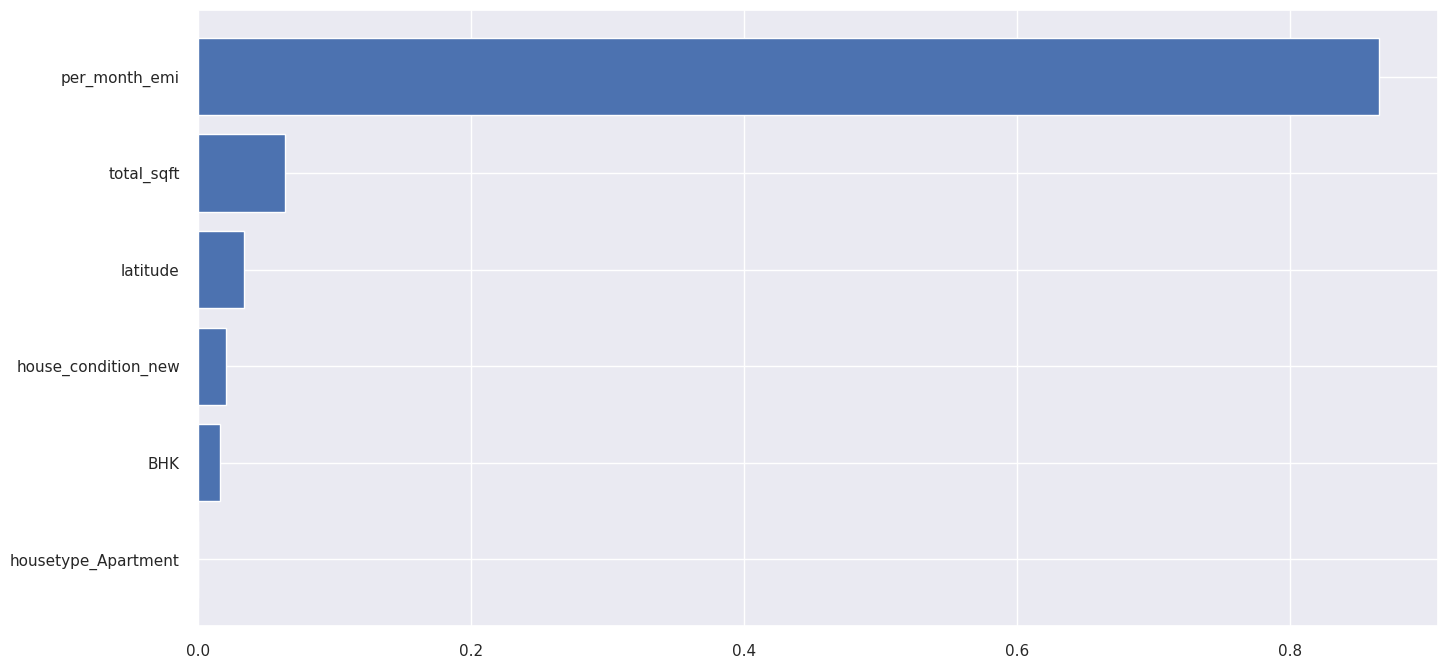

In [ ]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

## **Tree-based model and interpret the nodes**

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

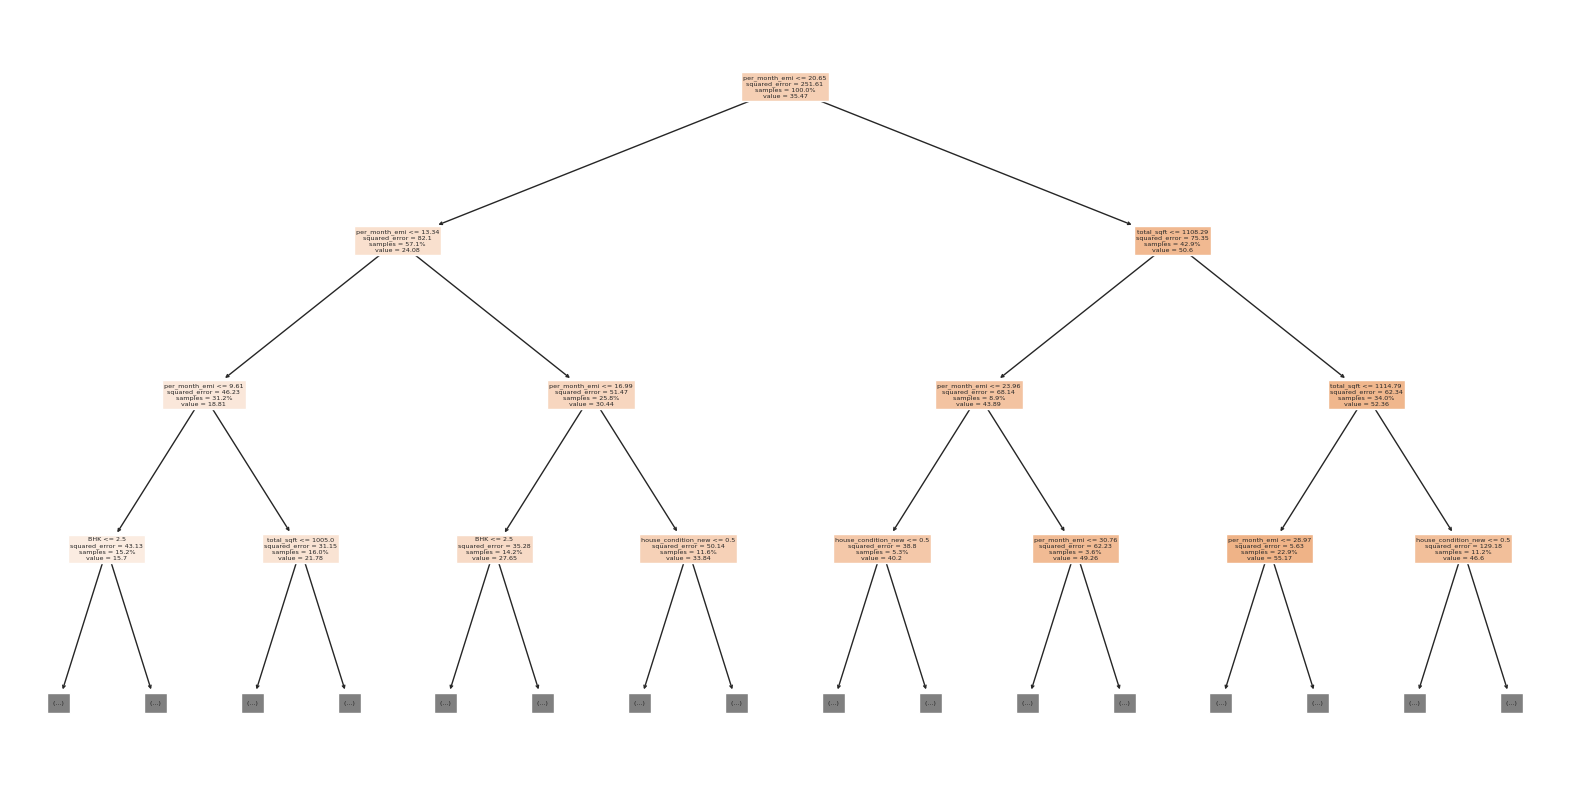

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=X_train.columns, filled=True, max_depth=3, precision=2, proportion=True)
plt.show()

## **Interpreting Nodes of a Tree-Based Model**

The Random Forest Regressor utilizes the notion of the collective knowledge. One of the numerous decision trees used to predict the target variable is the one shown above. For a given input, each decision tree regression predicts a number as the output. The final result of random forest regression is the average of those forecasts.

The tree has a value (i.e., the value to be predicted) associated with each leaf and conditions on each internal node as normal. Furthermore, we have plotted the mean of the response variables in each region, or the value at each internal node.

Starting from the extreme left side of the decision tree and interpreting the nodes as leaf 1, let's attempt to understand how the above decision tree functions.

Every terminal node has a split that lowers the squared_error.

It is evident that 100% of the samples are started by the root node.

The per_month_emi feature in this node is the one that divides the data into the several classes the best. As a result, there are two nodes: one with a SE of 75.35 and one with an 82.1.

In [ ]:
tree_summary = {
    "max_depth": tree_model.get_depth(),
    "n_leaves": tree_model.get_n_leaves(),
    "feature_importances": pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)
}


In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
cv_scores = {}
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = np.mean(score)


In [ ]:
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# **AutoML**

In [ ]:
!pip install h2o


## **Initiate H20**

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
df.shape

(4629, 7)

In [ ]:
df = df[(df['price'] <= 70) & (df['price'] >= 10)]

In [ ]:
df.shape

(4530, 7)

In [ ]:
pct_rows=0.80
df_train, df_test = hf.split_frame([pct_rows])

In [ ]:
h2o.init()

run_time = 3600  # 3600 seconds (1 hour)
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         3 hours 58 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_d6lddv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.891 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
X=hf.columns
y_numeric ='price'
X.remove(y_numeric)
print(X)

['BHK', 'per_month_emi', 'total_sqft', 'latitude', 'housetype_Apartment', 'house_condition_new']


In [ ]:
min_mem_size=6
run_time=222


pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_6_20240402_223036


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/47
# GBM base models (used / total)           3/19
# XGBoost base models (used / total)       6/22
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/3
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 7.923696259096665
RMSE: 2.8149060835304374
MAE: 1.3741835129526945
RMSLE: 0.09973979969460661
Mean Residual Deviance: 7.923696259096665
R^2: 0.9657902170612483
Null degrees of freedom: 3627
Residual degrees of freedom: 3616
Null deviance: 840320.1528484046
Residual deviance: 28747.1700280027
AIC: 17831.262082043533

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 19.35893175363616
RMSE: 4.399878606693162
MAE: 2.1720027745951165
RMSLE: 0.14633675519113826
Mean Residual Deviance: 19.35893175363616
R^2: 0.9164197072221565
Null degrees of freedom: 3627
Residual degrees of freedom: 3618
Null deviance: 840667.2511139773
Residual deviance: 70234.20440219199
AIC: 21068.14035451889

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     4227.89   158.547     4341.4        4354.51       4264.91       4215.52       3963.11
loglikelihood           0         0           0             0             0             0             0
mae                     2.17153   0.141562    2.39884       2.06533       2.20465       2.14034       2.04848
mean_residual_deviance  19.3663   1.8224      22.0953       17.4255       20.2135       18.6379       18.4593
mse                     19.3663   1.8224      22.0953       17.4255       20.2135       18.6379       18.4593
null_deviance           168133    4874.56     166960        170725        171105        171790        160087
r2                      0.916357  0.00780653  0.903635      0.922306      0.914054      0.920783      0.921009
residual_deviance       14046.8   1356.73     16085.3       13260.8       14675         13568.4       12644.7
rmse                    4.3969    0.204926    4.70056       4.17439       4.49594       4.31716       4.29643
rmsle                   0.146214  0.0076521   0.157766      0.13704       0.145785      0.147933      0.142544

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
print(aml.leaderboard)

model_id                                                    rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_6_20240402_223036     4.39988  19.3589  2.172    0.146337                   19.3589
StackedEnsemble_BestOfFamily_4_AutoML_6_20240402_223036  4.40685  19.4203  2.17336  0.146421                   19.4203
GBM_grid_1_AutoML_6_20240402_223036_model_12             4.48479  20.1133  2.21727  0.149019                   20.1133
StackedEnsemble_BestOfFamily_3_AutoML_6_20240402_223036  4.48537  20.1186  2.30523  0.149226                   20.1186
StackedEnsemble_AllModels_1_AutoML_6_20240402_223036     4.4859   20.1233  2.29944  0.149224                   20.1233
StackedEnsemble_AllModels_2_AutoML_6_20240402_223036     4.48791  20.1413  2.30169  0.149214                   20.1413
StackedEnsemble_BestOfFamily_2_AutoML_6_20240402_223036  4.48851  20.1467  2.30374  0.149291                   20.1467
XGBoost_grid_1_AutoML_6_20240402_223036_model_2 

## **Best model prediction**

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df1=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_3_AutoML_6_20240402_223036': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_6_20240402_223036': 1,
 'GBM_grid_1_AutoML_6_20240402_223036_model_12': 2,
 'GLM_1_AutoML_6_20240402_223036': 50}

In [ ]:
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:
autoML_model=(getBestModel(aml))
print(autoML_model)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


2
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_6_20240402_223036_model_12


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          52268                  7            7            7             20            117           71.0545

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 11.979315384578468
RMSE: 3.4611147603884023
MAE: 1.6975053671045104
RMSLE: 0.12108087595809913
Mean Residual Deviance: 11.979315384578468

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 20.1133054604737
RMSE: 4.484785999406627
MAE: 2.217270453381146
RMSLE: 0.1490191834644485
Mean Residual Deviance: 

In [ ]:
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])
best_model1.algo

2


'gbm'

## **Regularization**

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
X1=df.columns
print(X1)

Index(['BHK', 'price', 'per_month_emi', 'total_sqft', 'latitude',
       'housetype_Apartment', 'house_condition_new'],
      dtype='object')


2024-04-02 22:39:57.083 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.146999)
2024-04-02 22:39:57.123 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.147042)
2024-04-02 22:39:57.520 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.142633)
2024-04-02 22:39:57.991 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.143951)
2024-04-02 22:39:58.047 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.143547)
2024-04-02 22:39:58.125 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.144089)
2024-04-02 22:39:58.129 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.141444)
2024-04-02 22:39:58.148 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayl

          sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform          0.141176  813.345742  826.182696     inf      0.170845   
powerlaw         0.141235  816.237242  835.492674     inf      0.154313   
exponpow         0.141444  839.042047  858.297479     inf      0.150531   
rayleigh         0.142506  847.003232  859.840186     inf      0.143409   
chi2             0.142633  855.638975  874.894407     inf      0.134582   

              ks_pvalue  
uniform   4.505157e-116  
powerlaw   1.158207e-94  
exponpow   4.442852e-90  
rayleigh   9.271593e-82  
chi2       5.118789e-72  


Text(0.5, 0, 'price')

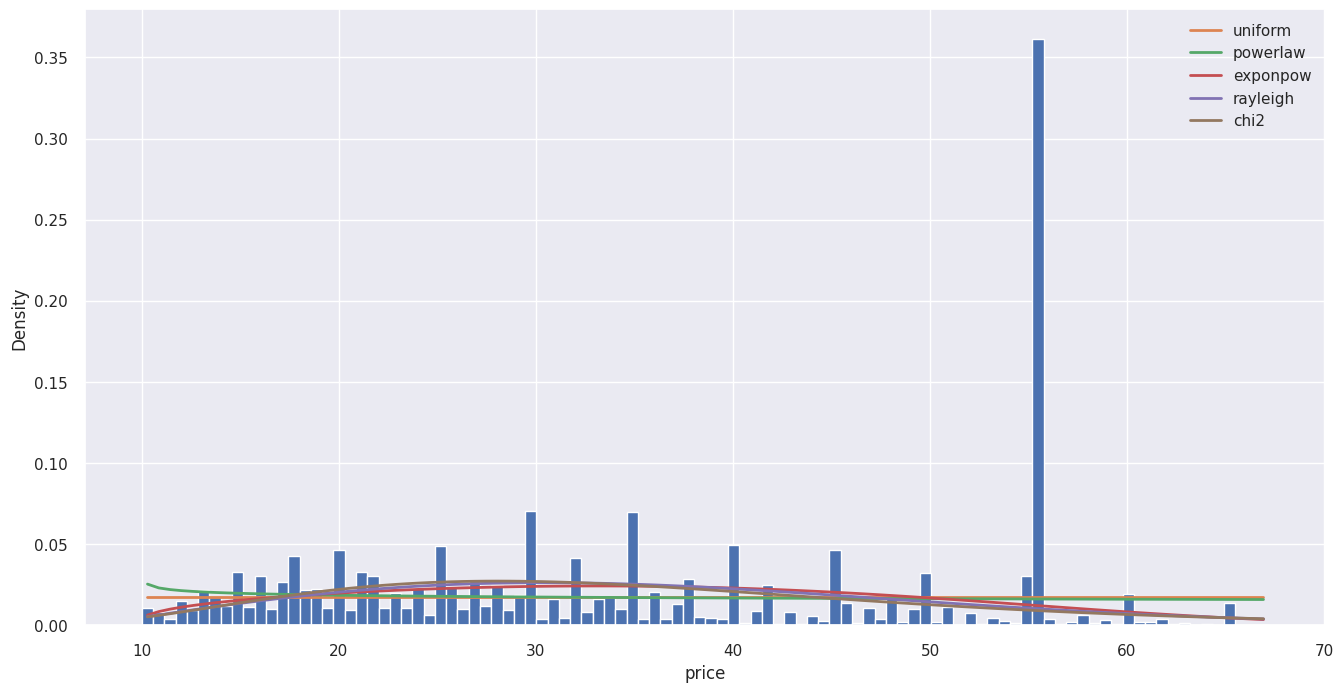

In [ ]:
price = df["price"].values
f = Fitter(price, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("price")

The model without regularizationn and the model with regularization are giving us the same results so we dont need the regularization for this model.

## **Hyperparameter Tuning**


Hyperparameter tuning is a crucial step in the machine learning workflow, aimed at enhancing a model's performance on a specific dataset through the identification and optimization of the most effective hyperparameters or their combinations. Unlike model parameters, which are learned during training, hyperparameters are set in advance. These include settings such as the learning rate, the number of hidden layers in a neural network, and the strength of regularization, among others. Adjusting these hyperparameters can lead to significant improvements in a model's accuracy and its ability to generalize well to new, unseen data.

In [ ]:
df.columns

Index(['BHK', 'price', 'per_month_emi', 'total_sqft', 'latitude',
       'housetype_Apartment', 'house_condition_new'],
      dtype='object')

In [ ]:
s = df['price']

t = df.drop(['price'], axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
mode = RandomForestRegressor()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]
}
random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,
n_iter=10, scoring='accuracy', cv=5,
refit=True, n_jobs=-1)

#Training and prediction
random_rf.fit(t_train, s_train)
preds = random_rf.best_estimator_.predict(t_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
random_rf.best_params_


{'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 800}

We can Interpret that per_month_emi is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%) housetype_Apartment is 0.009

**Is the relationship significant?**
 A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values  were greater than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.



**Are any model assumptions violated?**

Linearity and homoscedasticity:
From the rediduals graph we can see that the residuals around the horizantal line at zero with no pattern this indicates there is no violation of linearity and homoscedasticity.
Multicollinearity:
From the caluclated VIF values for all the predictor variables, all the values are below which implies that there is no multi collinearity.


**Is there any multicollinearity in the model?**

The use of Elastic Net regularization, which combines L1 and L2 penalties (controlled by alpha = 0.4, lambda = 0.01), helps to mitigate the effects of multicollinearity by shrinking some coefficients potentially to zero (more so with the L1 part of Elastic Net). The fact that all predictors remained active suggests multicollinearity might not be severely impacting the model, and VIF values also suggest that there is no multicollinearity in the model

**In the multivariate models are predictor variables independent of all the other predictor variables?**

This can be answered from the correlation table, the table which we have plotted doesnt have any variable which have a correlation greater than 0.7 Infact we had variables which had less correlation and we had to remove them. There is no dependence between the predictor variables.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

From the p values we can say per_month_emi, BHK, total_sqft, owners_encoded and cordinated_encoded all have 0.0 as per the graph plotted while building the model it indicated that per_month_emi is the most significant variable.

**Does the model make sense?**

With an R^2 of approximately 0.73, the model explains a substantial portion of the variance in the target variable, which is generally a good indicator of model fit in the context of your data. The choice of predictors seems reasonable based on their relative importances. The MSE is approx 65 and RMSE is approx 7 which is pretty good considering the small dataset we have and the attributes.

**Does regularization help?**

As the R2, MSE and RMSE values didnt get any better even after performing the Ridge Regularization, regularization was not particulary helpful in this scenario. The model was already performing pretty good before the regularization.

**Which independent variables are significant?**

As per the p-values, per_month_emi, BHK, total_sqft, owners_encoded and cordinated_encoded seems to be the significatn variables. However, per_month_emi appears to be the most important based on the variable importances.

**Which hyperparameters are important?**

As the regularization was not any helpful in improving the model I couldnt perform hyperparameters tuning on L1 and L2. Instead I have performed the tuning on RandomForestRegressor and I have achieved the results as follows:
{'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 800}

# **SHAP(SHapley Additive exPlanations) Analysis**

## **SHAP analysis on AutoML**

AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

In [ ]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

In [ ]:
autoML_model.explain(df_test)

## **Interpreting SHAP values from AutoML**

## **Residual Analysis**:
"DRF_1_AutoML_1_20240317_235430"s:

The plot does show evidence of changing variance (heteroscedasticity) across the range of predictions. The spread of residuals appears fairly constant, suggesting the model's errors are consistent across different levels of predictions.

## **Learning Curve Plot**:
DRF_1, The learning curve indicates that as the number of trees in the model increases, the mean squared error (MSE) on both the training and cross-validation sets decreases and then stabilizes. This suggests that the model is improving and then reaching a point where adding more trees doesn't significantly benefit the model's performance. The selected number of trees, indicated by the vertical green line, is likely the optimal model complexity, as it minimizes MSE without overfitting. Overall, the model shows a good balance between learning from the training data and generalizing to unseen data.

## **Variable Importance**
DRF_1_AutoML_1_20240317_235430

The variable importance graph indicates that the estimated monthly EMI payment (per_month_emi) and the total square footage (total_sqft) are the most influential factors in the model's predictions. Other factors like the number of bedrooms (BHK), geographical location (latitude), the condition of the house (house_condition_new), and the type of house (housetype_Apartment) also contribute to the model's predictions but to a lesser extent.

## **SHAP Summary**
Plot shows the impact of each feature on the model's output: per_month_emi: This feature has a wide spread of SHAP values, indicating varied influence on predictions, with both positive and negative effects.

total_sqft: This feature also shows a significant impact on predictions, with a mix of positive and negative contributions, but less variability than per_month_emi.

BHK: The number of bedrooms, halls, and kitchens has a narrower spread of SHAP values, suggesting a more consistent but moderate impact on the model's output.

house_condition_new: The condition of being new shows a moderate and more uniform impact on predictions, predominantly positive.

latitude: Latitude appears to have a lower and more varied influence on the model's predictions than other features.

housetype_Apartment: The type of house being an apartment has the least impact, with SHAP values clustered close to zero.

## **Partial Dependencies Plot**
There's a generally increasing trend, indicating that as per_month_emi increases, the model's predicted response also tends to increase. This suggests a positive correlation between monthly EMI amounts and the target variable.

The shaded area represents the confidence interval around the mean response line, which appears to widen as the per_month_emi increases. This could indicate greater uncertainty in the model's predictions at higher EMI values, possibly due to fewer data points in that range.

There's variability in the relationship, with some fluctuations observed. However, the overall trend is upward, which would be expected if higher EMIs are associated with more expensive properties or loans with higher principals

## **Individual Conditional Expectation**
Individual Conditional Expectation (ICE) plot for the feature per_month_emi, illustrating its marginal effect on the model's predictions for individual instances across different percentiles. The lines represent the change in the predicted response as per_month_emi varies for different data percentiles, highlighting the heterogeneity of its impact. The spread of the lines suggests varying effects of per_month_emi on the response, which may indicate interaction with other features. The dashed line represents the Partial Dependence Plot (PDP), showing the average effect of per_month_emi. This plot reveals the nuanced relationship between monthly payments and the predicted outcomes, deviating from a simple linear interpretation.

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

## **SHAP Plots**

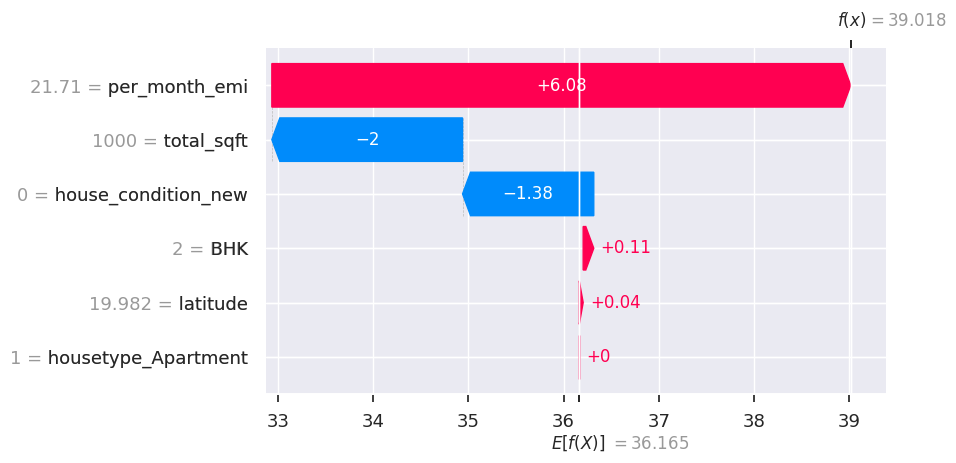

In [ ]:
shap.plots.waterfall(shap_values[0])

This SHAP waterfall plot shows the contribution of each feature to a single prediction. Starting from the base value (E[f(X)] = 36.165), which is the average prediction over the dataset, each feature's SHAP value (either positive or negative) is added sequentially to arrive at the final prediction (f(x) = 39.018) for this specific instance.

per_month_emi (21.71) has a substantial positive effect on the prediction, increasing it by about +6.08 from the base value.

total_sqft (1000) decreases the prediction by -2, which is a significant negative contribution.

house_condition_new (0) lowers the prediction by a smaller amount, -1.38. BHK (2) has a marginal positive contribution of +0.11. latitude (19.982) also positively influences the prediction, but only slightly, by +0.04.

housetype_Apartment (1) has no change in the prediction, indicating it may not be an influential feature for this particular instance.

## **Summary Plot**

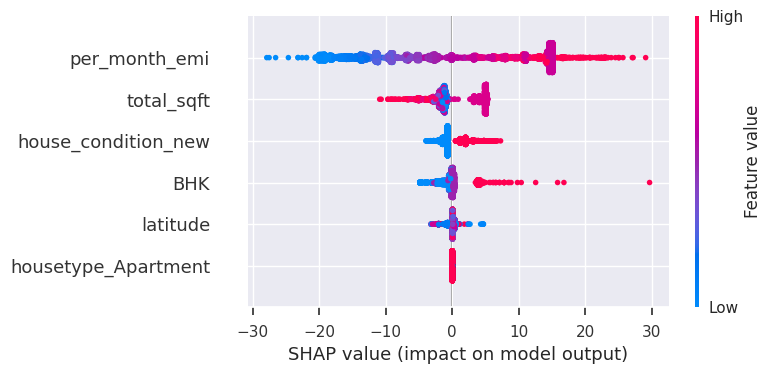

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=42)
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

## **Waterfall Plot**

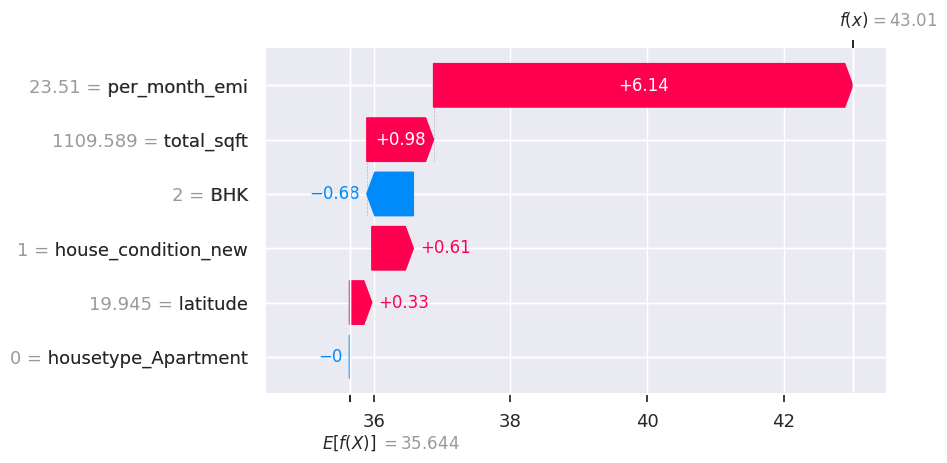

In [ ]:
shap.plots.waterfall(shap_values[0])

## **Feature Importance for model**

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

SHAP method is used to interpret the feature importance by assigning an importance score to each feature, indicating its contribution to the model's output.

The following plots are:

Importance of SHAP features for a linear model Significance of SHAP characteristic for tree-based model The charts below show that the two models' feature importance differs from one another.

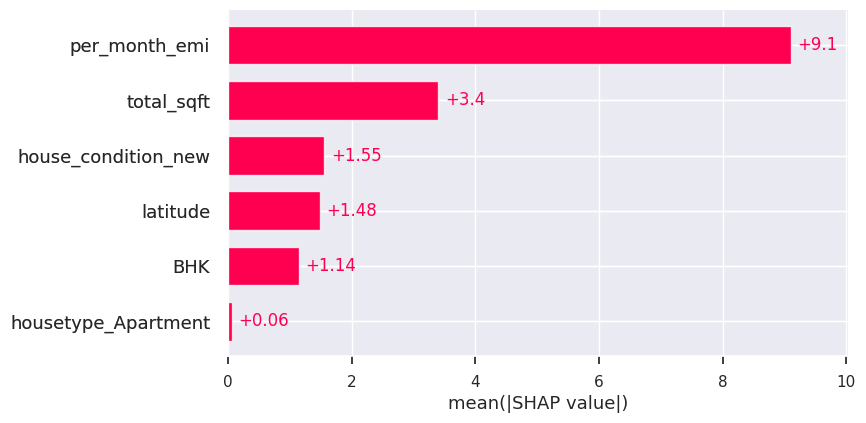

In [ ]:
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model are per_month_emi and total_sqft

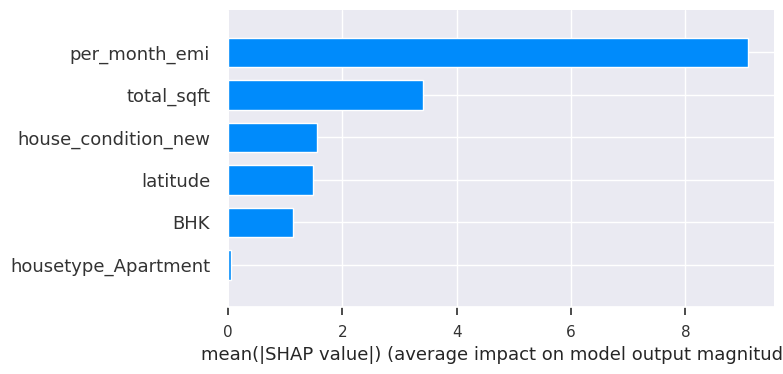

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

# **Interpreting the SHAP analysis for the Linear regression and Tree-based model**

In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Train a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
explainer_linear = shap.Explainer(linear_model.predict, X_train)
explainer_tree = shap.Explainer(tree_model.predict, X_train)

## **SHAP values for Linear regression model and Tree-based model**

In [ ]:
# Calculate SHAP Values
shap_values_linear = explainer_linear(X_train)
shap_values_tree = explainer_tree(X_train)

ExactExplainer explainer: 4167it [00:55, 50.20it/s]                          
ExactExplainer explainer: 4167it [00:24, 91.38it/s]


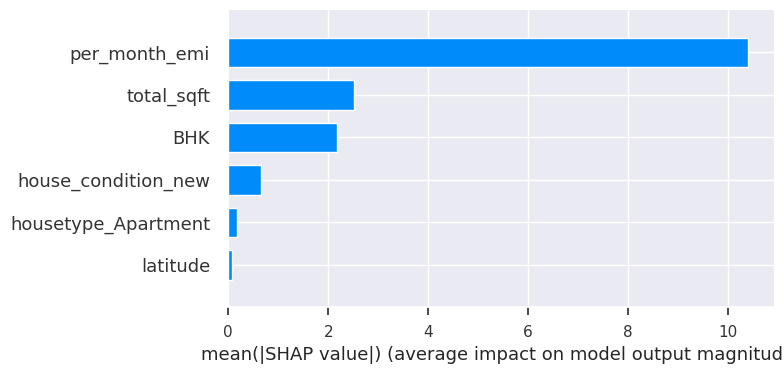

In [ ]:
# Summary plot for Linear Regression
shap.summary_plot(shap_values_linear, X_train, plot_type="bar")

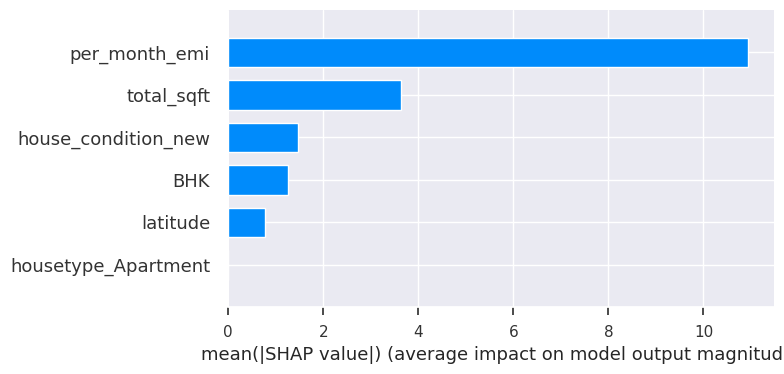

In [ ]:
# Summary plot for Decision Tree
shap.summary_plot(shap_values_tree, X_train, plot_type="bar")

### **Analysis Interpretation**

The direction and strength of the relationship between the features and the anticipated outcome are displayed on the SHAP summary graphs for the linear and tree-based models. The two models' most important features are total_sqft and per_month_emi, indicating that the size of the property and the monthly payment amount are the primary factors influencing the model's forecasts.

In the Tree-based model, BHK has a greater effect than in the Linear model; this could be because the Tree-based model can capture non-linear interactions between BHK and other characteristics.

House_condition_new makes a small but significant contribution to the forecast, suggesting that property age or condition affects the result, though not as much as per_month_emi and total_sqft.

In [ ]:
shap.initjs()

## **Linear regression model SHAP analysis**

ExactExplainer explainer: 4167it [00:38, 77.13it/s]                          


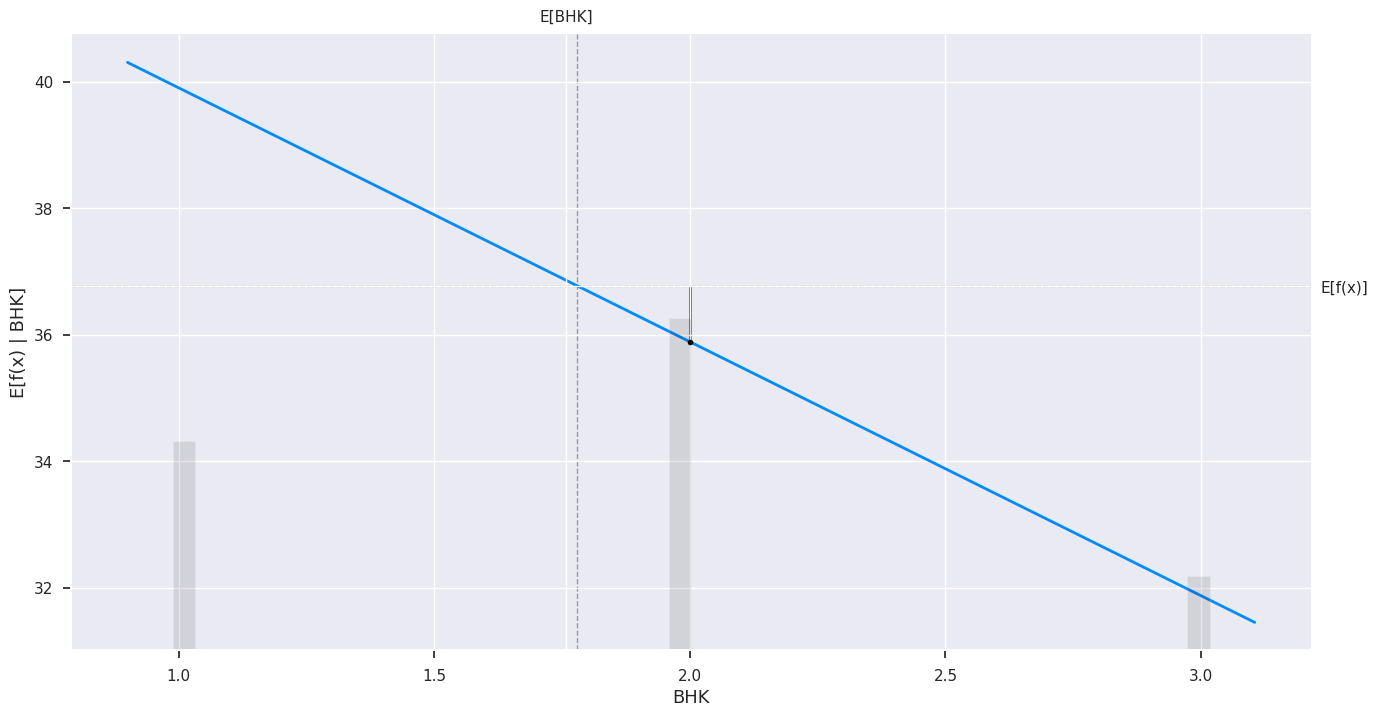

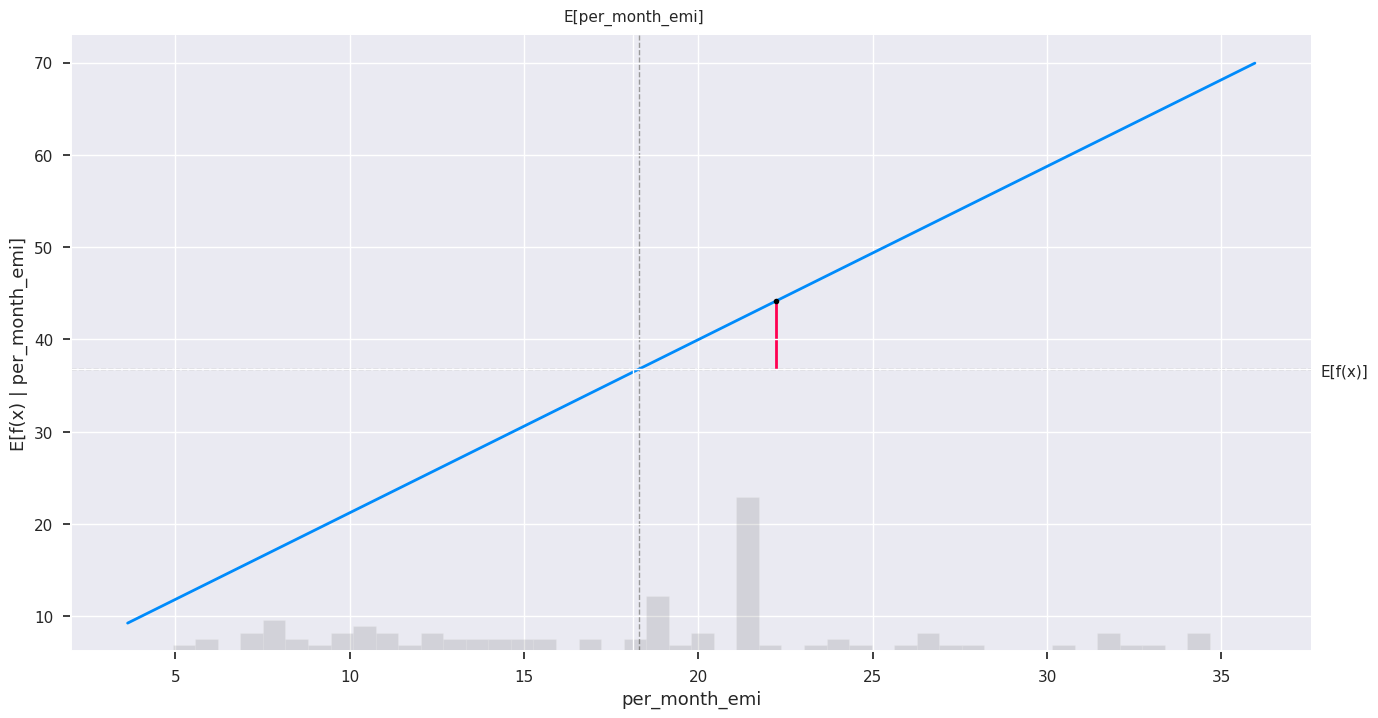

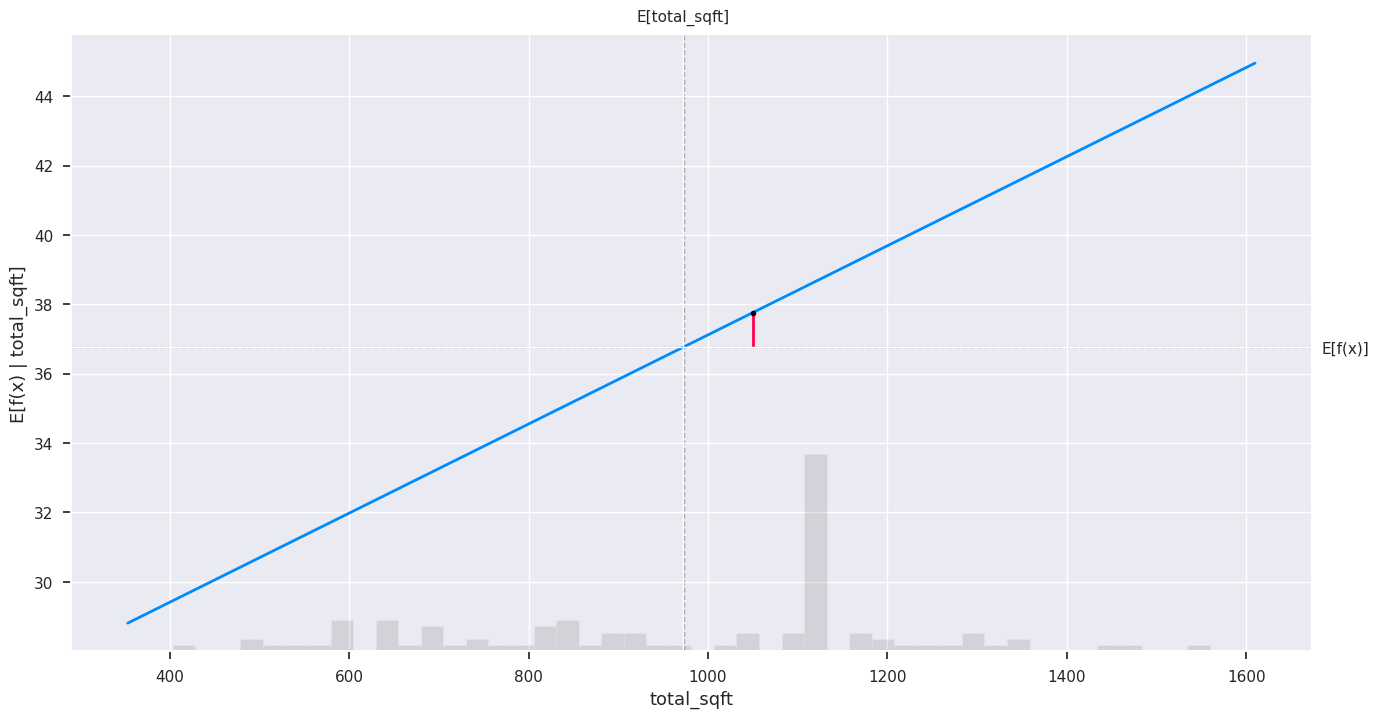

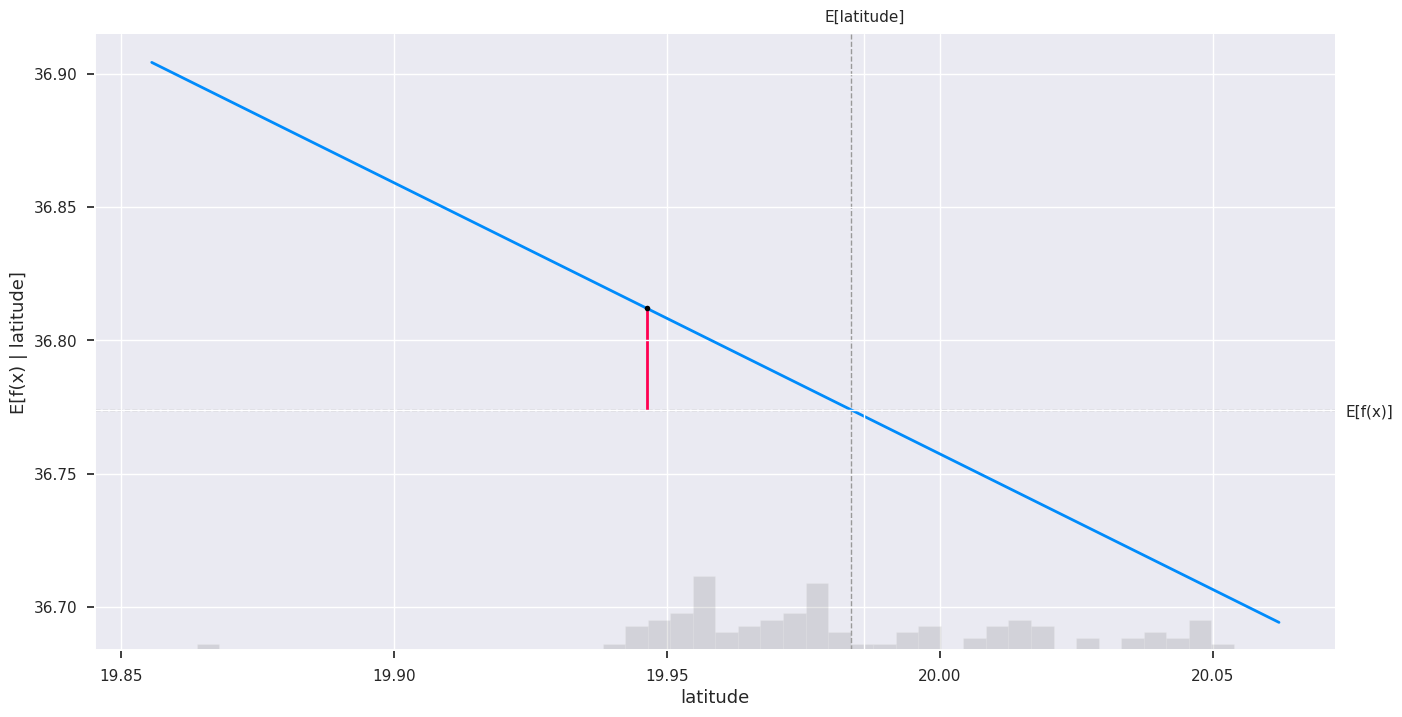

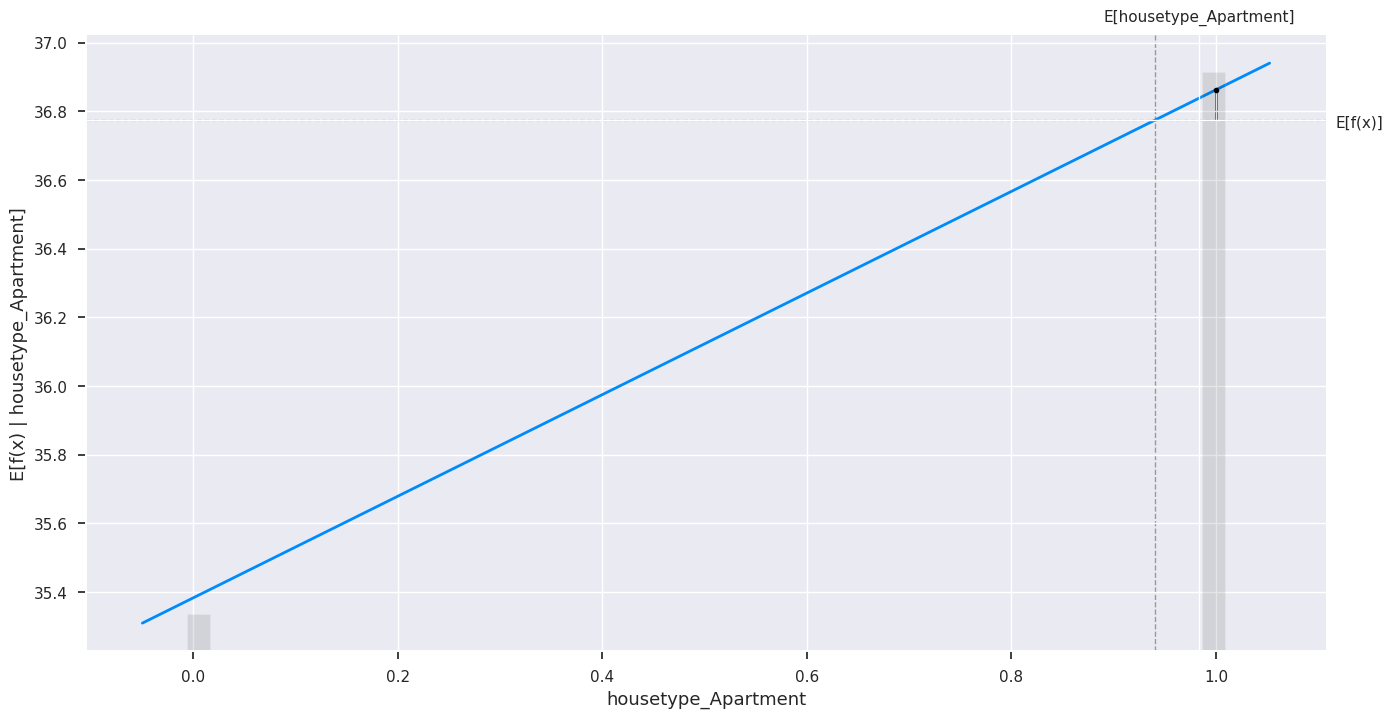

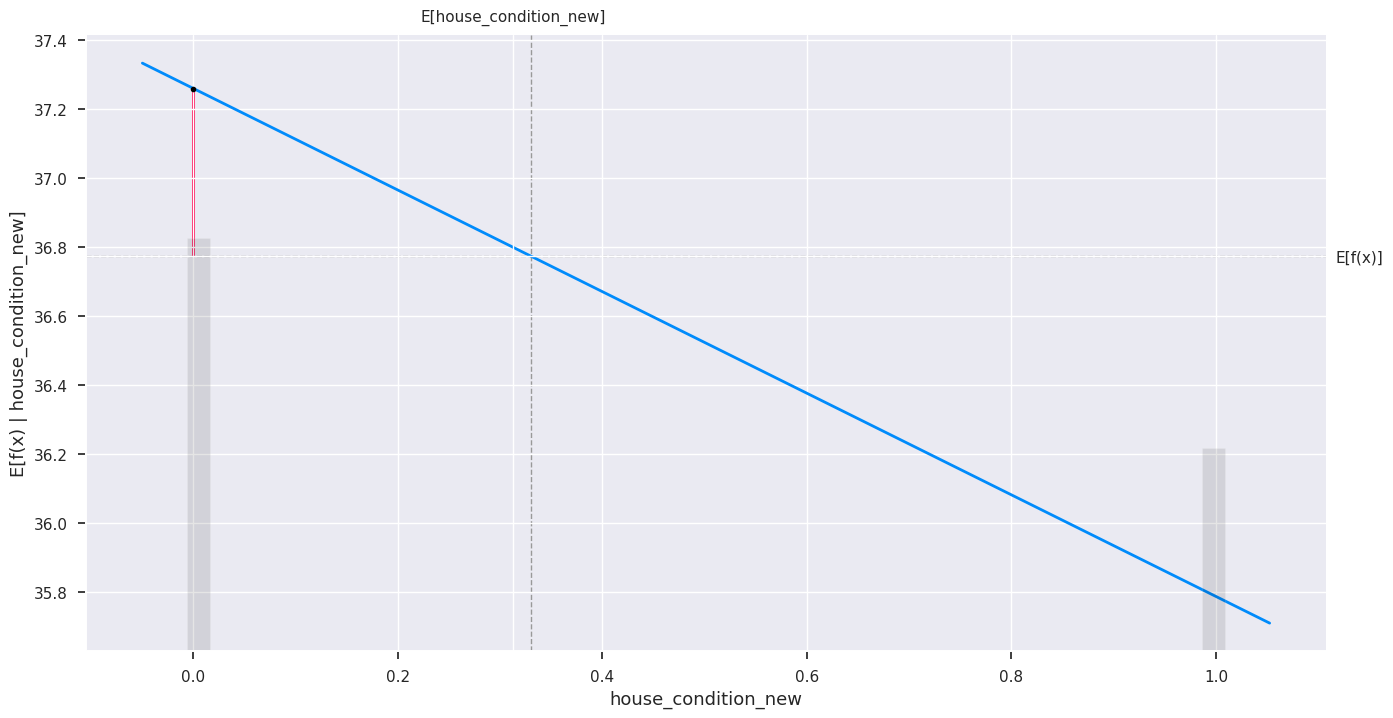

In [ ]:
# SHAP explanation of a Linear Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

x_train_100 = shap.utils.sample(
    X_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    X_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

## **Tree Based Model SHAP analysis**

ExactExplainer explainer: 4167it [00:28, 87.46it/s] 


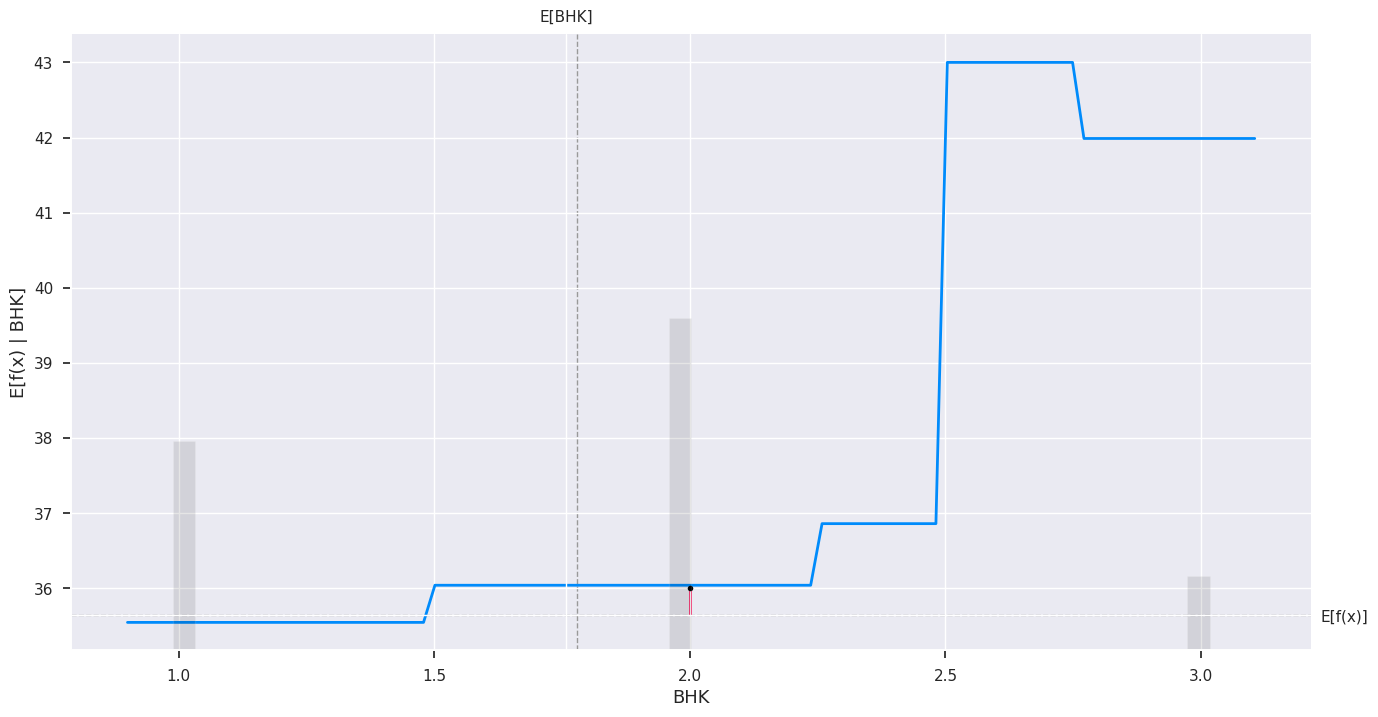

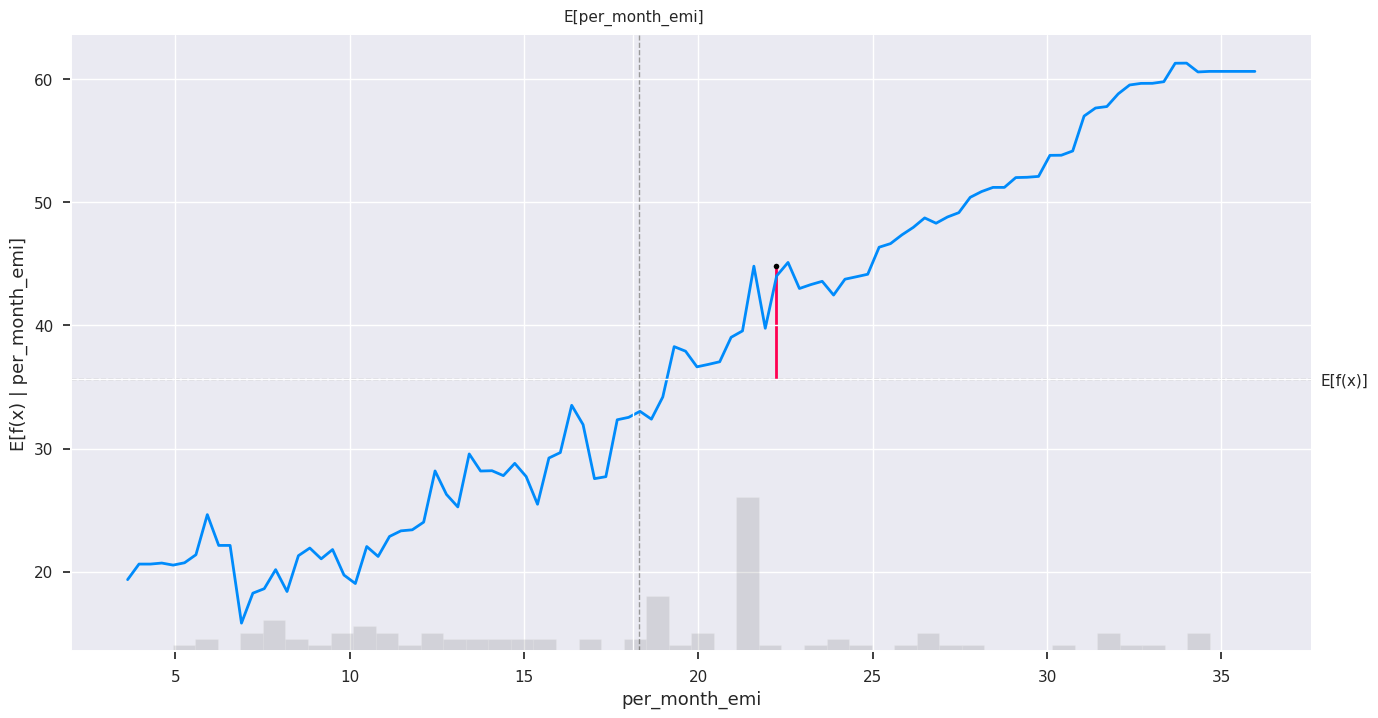

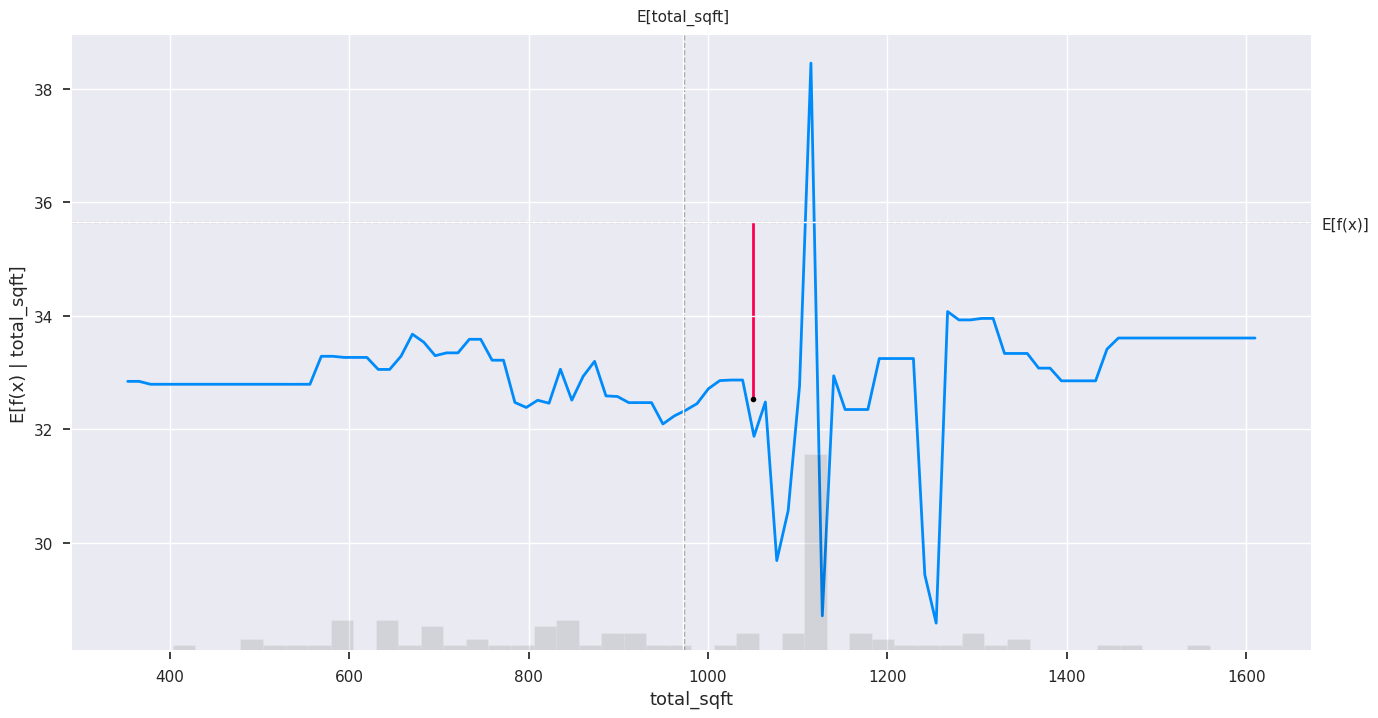

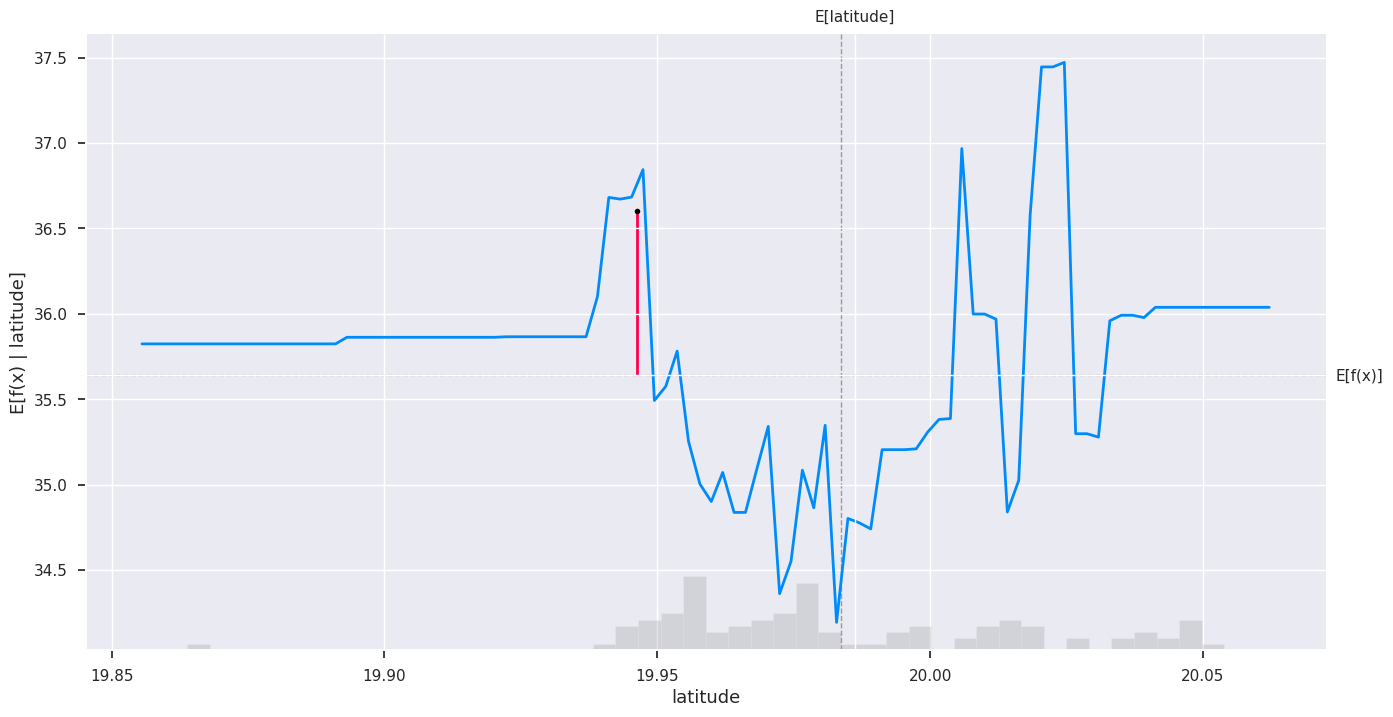

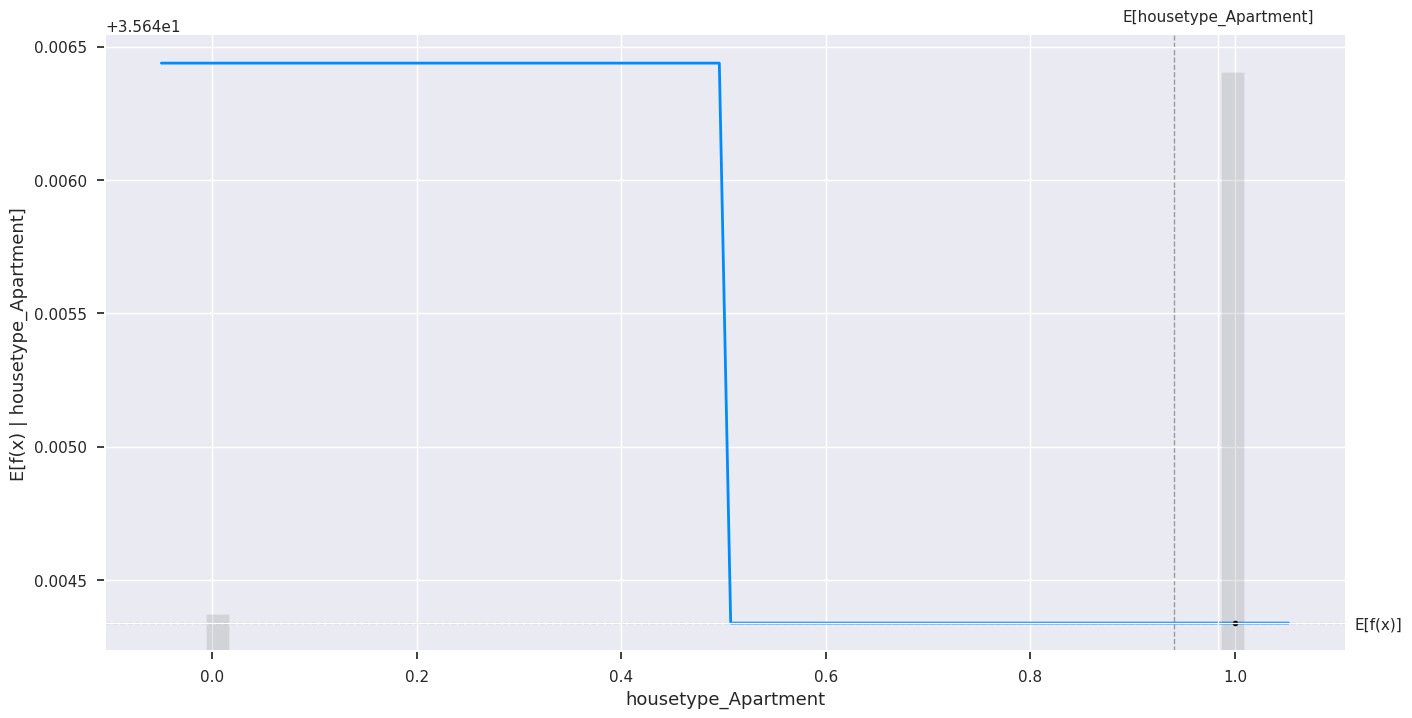

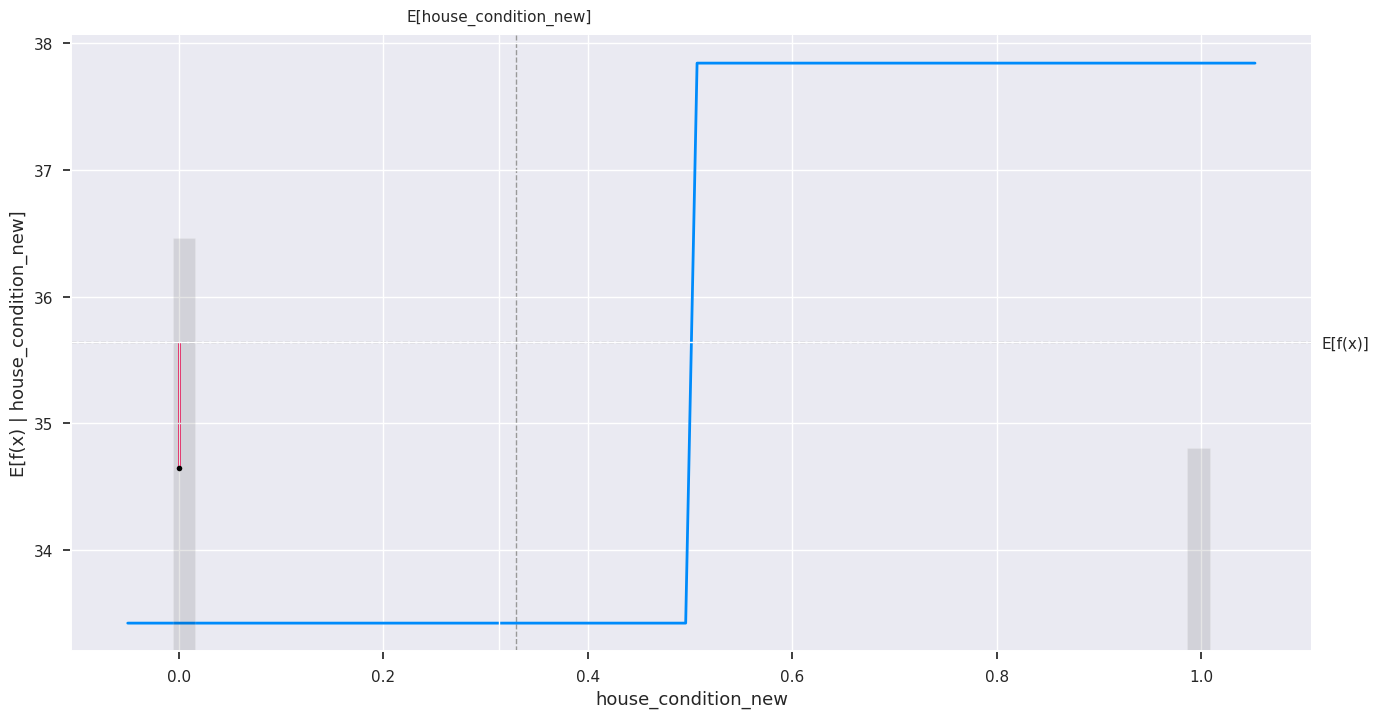

In [ ]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

# **Interpreting Waterfall plots for SHAP visualization on Linear model and Tree-based model**

The SHAP waterfall plots the contribution of each feature to individual predictions for a property's price.


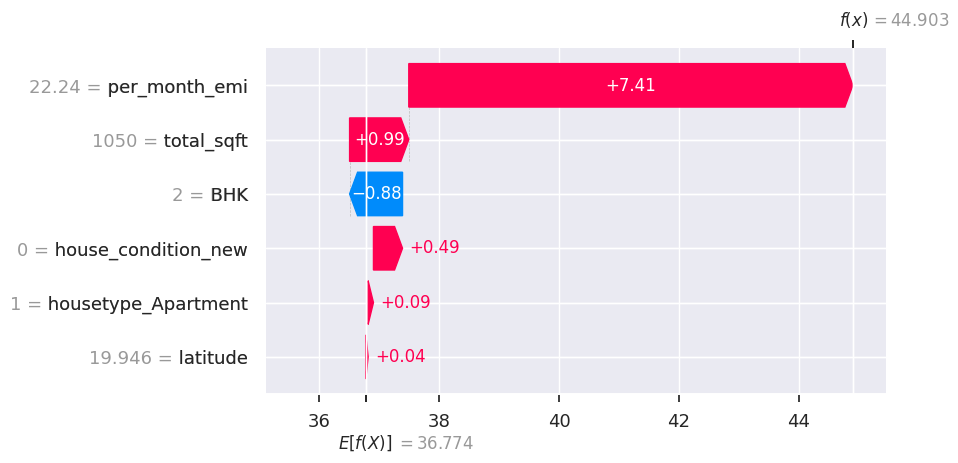

In [ ]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

The base value (E[f(X)]) is 36.774, which is the average prediction across the dataset. per_month_emi has the largest positive effect, increasing the prediction by +7.41. total_sqft contributes positively but has a smaller effect (+0.99). BHK has a negative impact, decreasing the prediction slightly by -0.88. Both house_condition_new and housetype_Apartment do not contribute to changing the prediction from the base value in this instance. latitude has a very minimal positive effect (+0.04). The final prediction (f(x)) is 44.903, which is the sum of the base value and all feature contributions.

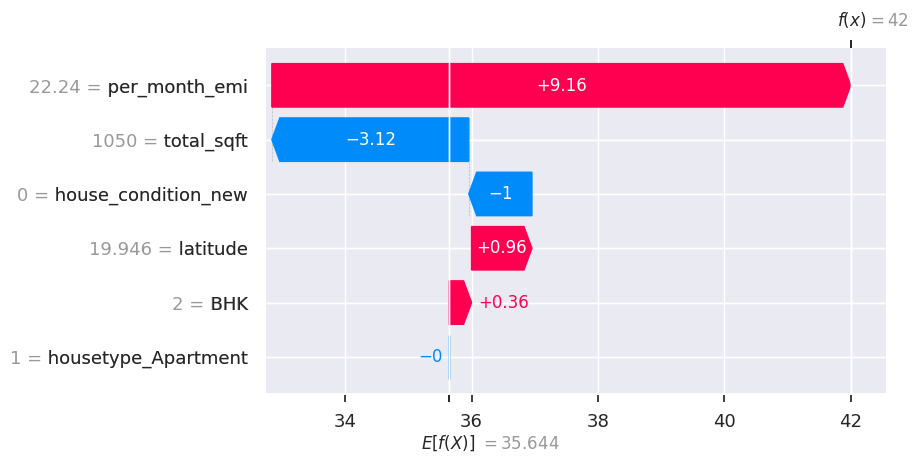

In [ ]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

The base value (E[f(X)]) starts at 35.644. per_month_emi again has the largest positive impact, pushing the prediction up by +9.16. total_sqft negatively impacts the prediction by -3.12, suggesting that in this case, larger properties are predicted to be less expensive, perhaps due to other factors not shown. BHK has a small positive contribution (+0.36). house_condition_new reduces the prediction by -1. Both latitude and housetype_Apartment appear to have no effect on the prediction. The final prediction (f(x)) for this property is 42.

# **Interpreting Summary plots for SHAP visualization on Linear model and Tree-based model**

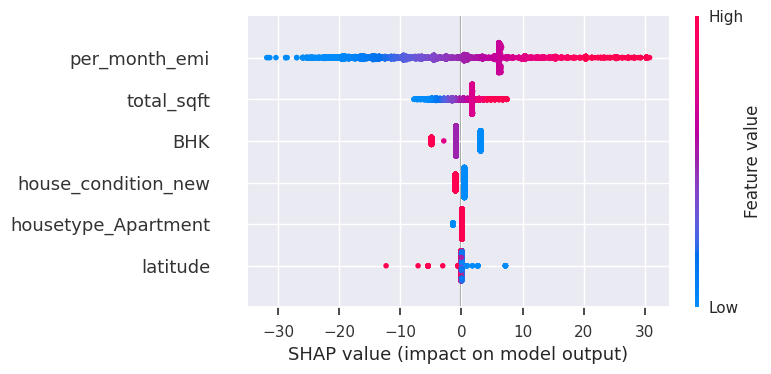

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, X_train)

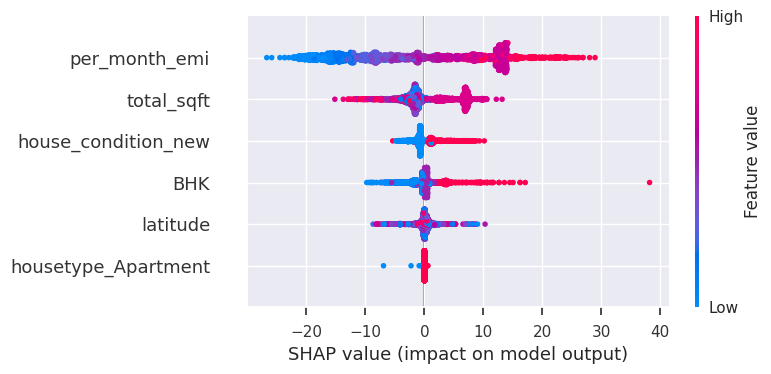

In [ ]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X_train)


# **Interpreting SHAP dependence plot for Linear and Tree-based model**


The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot.

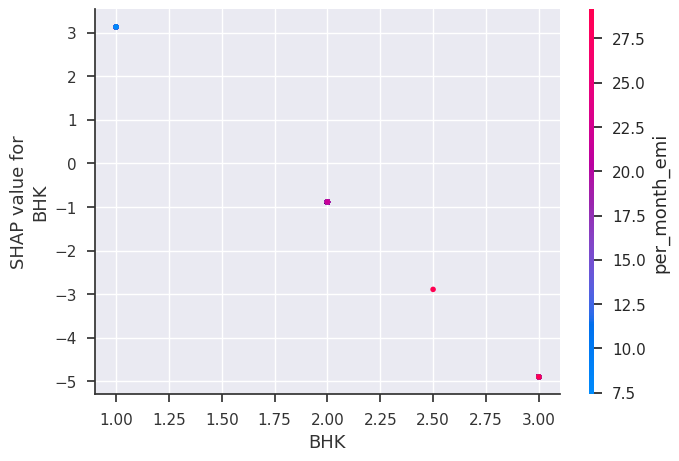

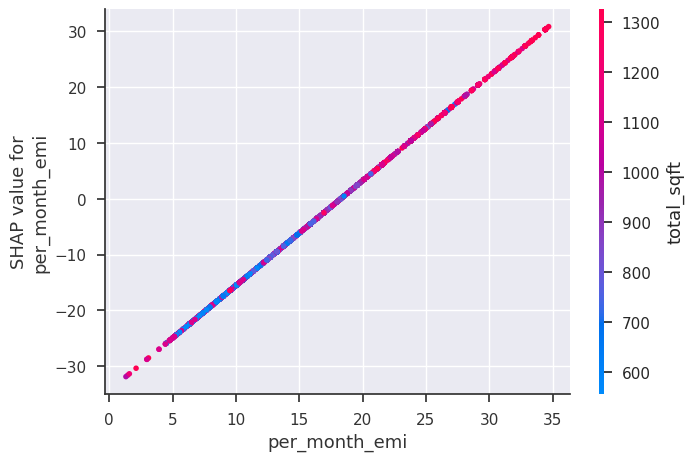

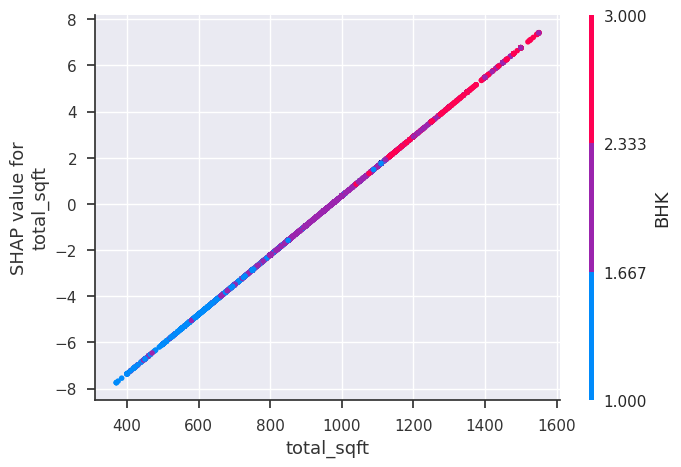

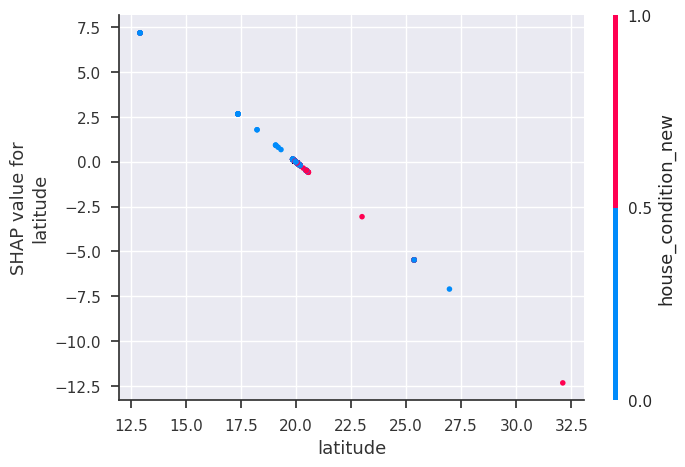

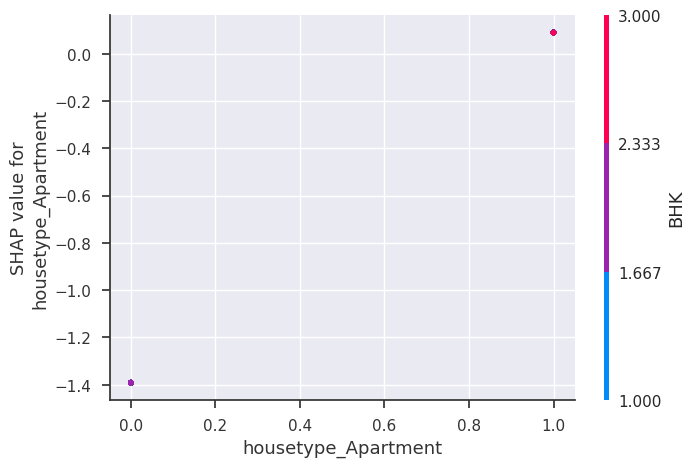

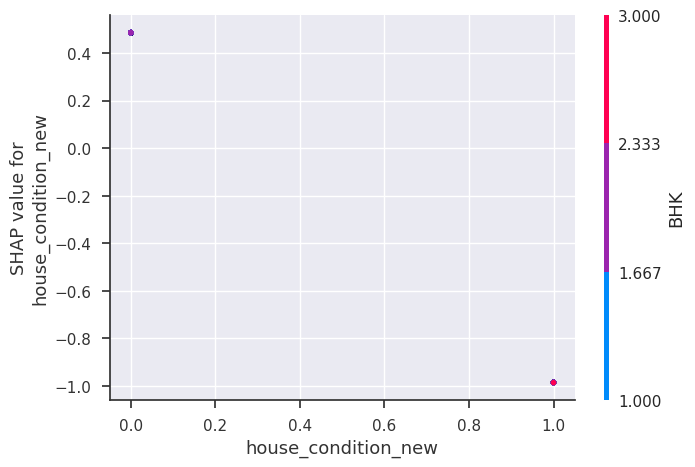

In [ ]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, X_train)

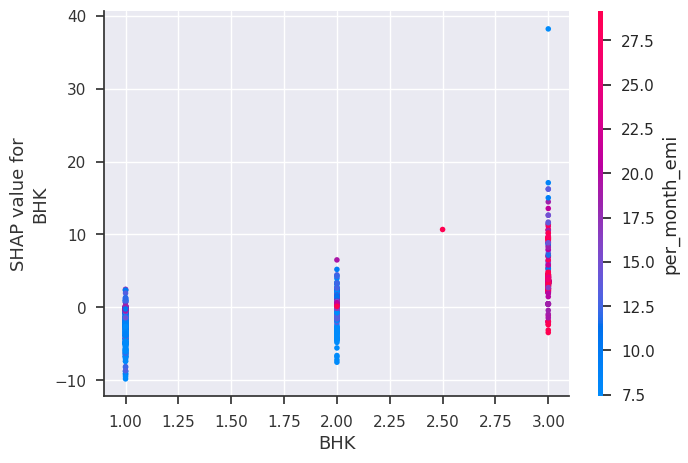

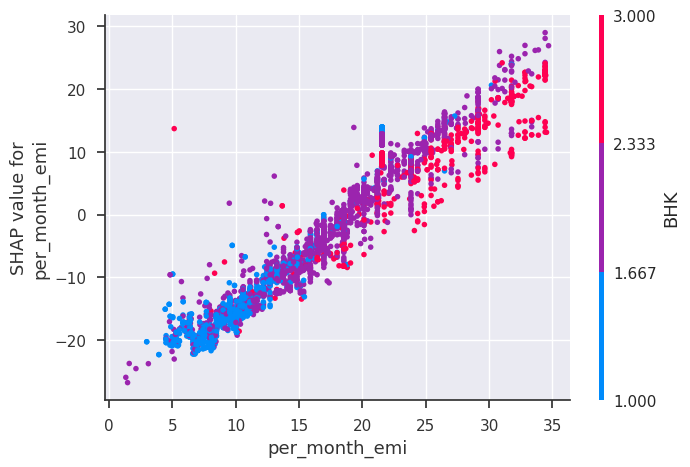

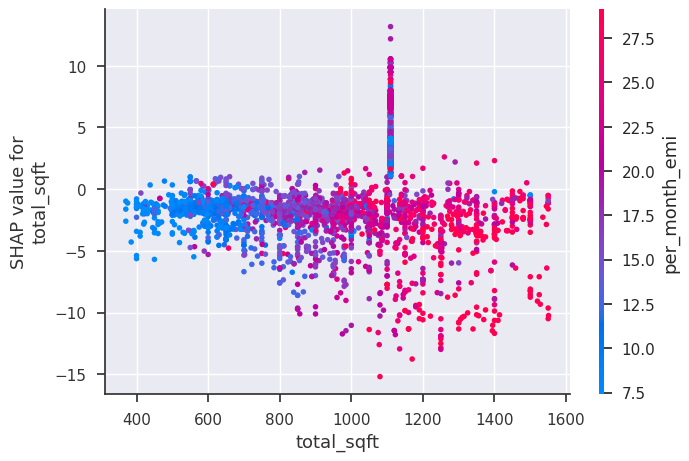

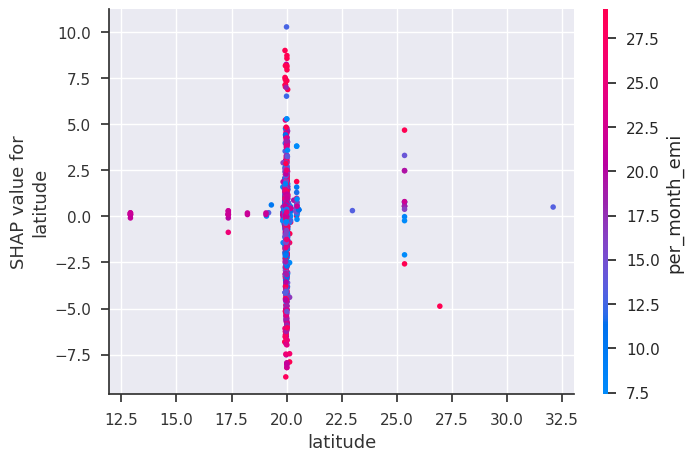

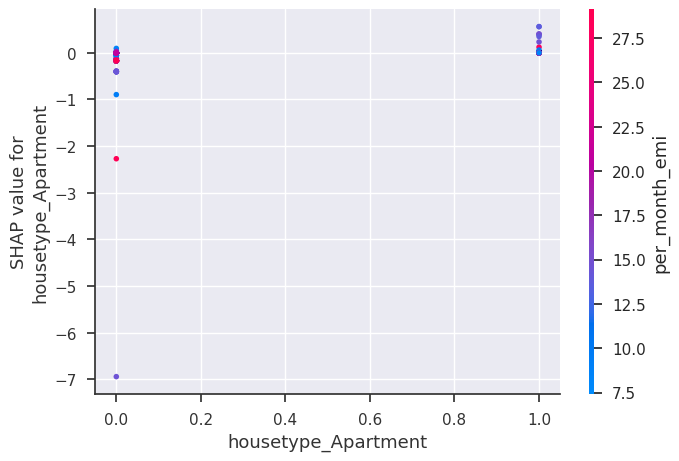

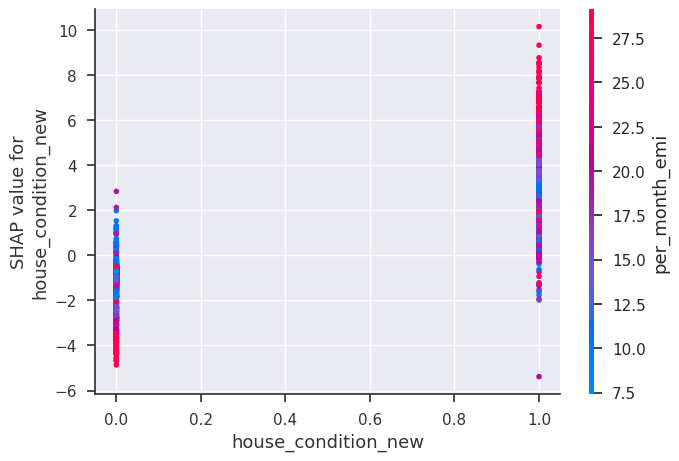

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, X_train)

The projected value typically increases as per_month_emi increases, according to the SHAP dependence plot for per_month_emi, which shows a strong positive connection with the model's output. An interaction effect, whereby greater BHK values magnify the increase in SHAP value, is suggested by the color-coding based on BHK. Additionally, the plot shows fluctuation, suggesting the influence of additional features not depicted here. More confidence in the range of forecasts is indicated by a dense clustering of points at lower per_month_emi values. The relationship is complex and involves interactions in addition to linearity, as seen by the divergence from a straight line. This is especially clear when looking at the color gradient that varies to represent different BHK values.

The objective variable may be predicted with greater accuracy because to per_month_emi, and a crucial interactive aspect in this study is BHK. These complex relationships, which could be overlooked or oversimplified in models that do not take interaction effects into account, are made easier to see thanks to the depiction.

# **Force Plot SHAP analysis**

This plot is the same as the waterfall model which we saw above the only difference is the visualization is condensed. It is really up to an individual which visualization is preferred some find this easier to read others find the waterfall model easier to read

Let us consider one sample from the test set, Please refer to the Force Plot below The features which had a significant positive impact on per_month_emi

In [ ]:
X_output_linear = X_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = X_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [ ]:
# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

In [ ]:
print(shap_plot_tree(18))  # SHAP force plot for sample 18

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 20
run_time = 222

# Setting up memory
pct_memory = 10
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

85


# **LIME (Local Interpretation Model-Agnostic Explanation) Analysis**

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
model = LinearRegression()

#model to the training data
model.fit(X_train, y_train)

#predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Getting LIME interpretation

idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)

# predicts the target value for the instance with index 0 in the np_x_test array using the linear regression model lin_reg
print("Prediction : ", reg.predict(np_x_test[0].reshape(1, -1)))

#np_y_test[idx] retrieves the target value for the instance of interest with index idx
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], reg.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Prediction :  [65.31]
Actual :      39.25


In [ ]:
 # Display Results in Notebook
lime_linear_explanation.show_in_notebook()

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Prediction :  [43.01]
Actual :      39.25


In [ ]:
 # Display Results in Notebook
lime_tree_explanation.show_in_notebook()

For this case, the anticipated value according to the LIME analysis is 39.2. Per_month_emi has the largest positive influence and significantly raises the forecast, suggesting that a higher EMI is highly correlated with a higher goal value. Additionally, total_sqft significantly increases the value, indicating that larger homes are worth more. House_condition_new, on the other hand, lowers the prediction, indicating that newer homes would be worth less in this specific situation. The remaining features, housetype_Apartment and BHK, have little to no effect on the estimated value. The contribution of each feature to the prediction is highlighted in this analysis, with total_sqft and per_month_emi having the most influence.

# **Comparision between SHAP, LIME, and Partial Dependence Plot Analysis**


*   SHAP (SHapley Additive exPlanations) interprets complex models by approximating Shapley values, to understand the contribution of each feature to a model's output.

*    LIME generates local model explanations by approximating a model with an interpretable one and explaining the behavior of the interpretable model in the vicinity of a specific instance. The LIME plot above shows how each feature is contributing towards a records decision

*   Partial dependence plot (PDP) visualizes the marginal effect of a feature on the predicted outcome, while holding all other features constant at their average values.



# **Conclusion**

The GBM is the best model for this task as it has the lowest RMSE on cv data compared to the other models tested in this excercise.


# What is the Question?

Which variables most significantly influence the prediction of house price in the Nashik town in india, and how accurately can it be predicted using machine learning models?

# What did you do ?

- Assessed data types: The dataset comprised both numeric  and categorical variables (e.g.per_month_emi, price, BHK, total_sqft, etc).
- Addressed missing values: Identified and handled missing data in variables like BHK and per_month_emi.
- Analyzed variable distributions: Explored distributions of numeric variables using statistical methods.
- Feature Importance: Utilized correlation analysis, recursive feature elimination, and principal component analysis to determine significant predictors.
- Multicollinearity Check: Evaluated variables for high multicollinearity to ensure model robustness.
- Implemented H2O Auto ML for predictive modeling to forecast loan default.
Split data into training and testing sets, ensuring consistency in data distribution.
- Assessed model accuracy and variable importance.
Conducted outlier analysis and experimented with data omission and imputation to gauge impact on model performance.



## How Well Did It Work?

The best model worked with an RMSE of 4.2 which implies that the model can predict the price +or - 4 lakhs, which is very good considering we had approx 3000 rows after cleaning the data.

## What did you learn ?

*  Feature selection identified essential variables, boosting prediction accuracy. Data cleaning ensured reliable inputs, enhancing model performance.
*  Reducing irrelevant variables through feature selection minimized overfitting and improved model generalization.
* AutoML automated the model selection process, saving time and increasing prediction accuracy.
*  SHAP values provided insights into the contribution of each feature to predictions, improving model interpretability.

Overall improvements included better data quality, higher model accuracy, enhanced interpretability, more informed decision-making, and a deeper understanding of complex data relationships.

# **References**

https://www.kaggle.com/code/geetmukherjee/nashik-apartment-price-prediction-ridge

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb

Refered Kaggle contributions and sample notebook given for this assignment for one hot encoding

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://www.statology.org/how-to-read-a-correlation-matrix/

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

All other code and function implementation are independently written.

# **Licensing and Citation**

https://creativecommons.org/publicdomain/zero/1.0/

This Notebook has been released under the Apache 2.0 open source license.

Copyright (c) 2024 Rutuja Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.